In [1]:
#  googleドライブのマウント
import os
from google.colab import drive

drive.mount('/content/drive/')
print(os.listdir('/content/drive/My Drive/data/')) # /content/drive/My Drive/data/ のファイル名を表示
# 作業ファイルをマイドライブに変更
os.chdir('/content/drive/My Drive/') 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/
['wiki-ja.model', '改行付きテキスト.txt', 'countID_MeCab.npy', 'countID_sentencepiece.npy', 'tfidfID_sentencepiece.npy', 'dictID_MeCab.pickle', 'dictID_sentencepiece.pickle', 'WordsID.xlsx', 'termextract2.xlsx', 'termextract - コピー.xlsx', 'result.pickle', 'word_Random Projection of the digits.jpg', 'word_Hessian LLE.jpg', 'word_Spectral Embedding.jpg', 'word_Local Tangent Space Alignment.jpg', 'word_Multi-dimensional Scaling.jpg', 'word_t-distributed.jpg', 'word_Rand

In [2]:
# ラベル（正解）データの作成 インキ=0, 機構=1, 受容シート=2, 用途=3

import pandas as pd

df = pd.read_excel('data/orinigal_data.xlsx', sheet_name='text', 
                   usecols=['公報番号(全文リンク)', 'インキ', '機構', '受容シート', '用途'])
print(df.head())
print('インキデータ数='+str(sum(df['インキ'])), '機構データ数='+str(sum(df['機構'])), 
      '受容シートデータ数='+str(sum(df['受容シート'])), '用途データ数='+str(sum(df['用途'])))

category = df.values[:, 1:].astype('float')
print('category:', category)
print( 'インキ:'+str(sum(category[:, 0]))+'個　機構:'+str(sum(category[:, 1]))+
      '個　受容シート:'+str(sum(category[:, 2]))+'個　用途:'+str(sum(category[:, 3]))+'個')

     公報番号(全文リンク)  インキ  機構  受容シート  用途
0  特開2019-218636    0   0      0   1
1  特開2019-218522    1   0      0   0
2  特開2019-218514    1   0      0   0
3  特開2019-218448    1   0      0   0
4  特開2019-218446    1   0      0   0
インキデータ数=1459 機構データ数=2726 受容シートデータ数=216 用途データ数=325
category: [[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
インキ:1459.0個　機構:2726.0個　受容シート:216.0個　用途:325.0個


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_single(trend, filename, NN_out, loss, optimizer):
  lning_length = len(trend.history['loss'])
  plt.plot(range(1, lning_length+1), trend.history['acc'], label='acc')
  plt.plot(range(1, lning_length+1), trend.history['val_acc'], label='val_acc')
  plt.plot(range(1, lning_length+1), trend.history['loss'], label='loss')
  plt.plot(range(1, lning_length+1), trend.history['val_loss'], label='val_loss')
  plt.xlabel('epoch')
  plt.ylabel('loss/acc')
  plt.legend()
  plt.show()
  print(filename, NN_out, loss, optimizer)
  

def plot_quad_history(trend, filename, NN_out, loss, optimizer): #  
  fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10,3), sharex=True)
  #ax0.plot(range(1, len(trend.history['acc'])+1), trend.history['acc'], label='acc')
  #ax0.plot(range(1, len(trend.history['val_acc'])+1), trend.history['val_acc'], label='val_acc')
  ax0.plot(range(1, len(trend.history['out_0_acc'])+1), trend.history['out_0_acc'], label='acc_0')
  ax0.plot(range(1, len(trend.history['val_out_0_acc'])+1), trend.history['val_out_0_acc'], label='val_acc_0')
  ax0.plot(range(1, len(trend.history['loss'])+1), trend.history['loss'], label='loss')
  ax0.plot(range(1, len(trend.history['val_loss'])+1), trend.history['val_loss'], label='val_loss')
  ax0.plot(range(1, len(trend.history['out_0_loss'])+1), trend.history['out_0_loss'], label='loss_0')
  ax0.plot(range(1, len(trend.history['val_out_0_loss'])+1), trend.history['val_out_0_loss'], label='val_loss_0')
  ax0.set_xlabel('epoch')
  ax0.set_ylabel('loss/acc')
  ax0.set_ylim(0,1.05)
  ax0.legend()
  #ax1.plot(range(1, len(trend.history['acc'])+1), trend.history['acc'], label='acc')
  #ax1.plot(range(1, len(trend.history['val_acc'])+1), trend.history['val_acc'], label='val_acc')
  ax1.plot(range(1, len(trend.history['out_1_acc'])+1), trend.history['out_1_acc'], label='acc_1')
  ax1.plot(range(1, len(trend.history['val_out_1_acc'])+1), trend.history['val_out_1_acc'], label='val_acc_1')
  ax1.plot(range(1, len(trend.history['loss'])+1), trend.history['loss'], label='loss')
  ax1.plot(range(1, len(trend.history['val_loss'])+1), trend.history['val_loss'], label='val_loss')
  ax1.plot(range(1, len(trend.history['out_1_loss'])+1), trend.history['out_1_loss'], label='loss_1')
  ax1.plot(range(1, len(trend.history['val_out_1_loss'])+1), trend.history['val_out_1_loss'], label='val_loss_1')
  ax1.set_xlabel('epoch')
  ax1.set_ylabel('loss/acc')
  ax1.set_ylim(0,1.05)
  ax1.legend()
  if len(trend.history) > 10:
    fig, (ax2, ax3) = plt.subplots(ncols=2, figsize=(10,3), sharex=True)
    #ax2.plot(range(1, len(trend.history['acc'])+1), trend.history['acc'], label='acc')
    #ax2.plot(range(1, len(trend.history['val_acc'])+1), trend.history['val_acc'], label='val_acc')
    ax2.plot(range(1, len(trend.history['out_2_acc'])+1), trend.history['out_2_acc'], label='acc_2')
    ax2.plot(range(1, len(trend.history['val_out_2_acc'])+1), trend.history['val_out_2_acc'], label='val_acc_2')
    ax2.plot(range(1, len(trend.history['loss'])+1), trend.history['loss'], label='loss')
    ax2.plot(range(1, len(trend.history['val_loss'])+1), trend.history['val_loss'], label='val_loss')
    ax2.plot(range(1, len(trend.history['out_2_loss'])+1), trend.history['out_2_loss'], label='loss_2')
    ax2.plot(range(1, len(trend.history['val_out_2_loss'])+1), trend.history['val_out_2_loss'], label='val_loss_2')
    ax2.set_xlabel('epoch')
    ax2.set_ylabel('loss/acc')
    ax2.set_ylim(0,1.05)
    ax2.legend()
    #ax3.plot(range(1, len(trend.history['acc'])+1), trend.history['acc'], label='acc')
    #ax3.plot(range(1, len(trend.history['val_acc'])+1), trend.history['val_acc'], label='val_acc')
    ax3.plot(range(1, len(trend.history['out_3_acc'])+1), trend.history['out_3_acc'], label='acc_3')
    ax3.plot(range(1, len(trend.history['val_out_3_acc'])+1), trend.history['val_out_3_acc'], label='val_acc_3')
    ax3.plot(range(1, len(trend.history['loss'])+1), trend.history['loss'], label='loss')
    ax3.plot(range(1, len(trend.history['val_loss'])+1), trend.history['val_loss'], label='val_loss')
    ax3.plot(range(1, len(trend.history['out_3_loss'])+1), trend.history['out_3_loss'], label='loss_3')
    ax3.plot(range(1, len(trend.history['val_out_3_loss'])+1), trend.history['val_out_3_loss'], label='val_loss_3')
    ax3.set_xlabel('epoch')
    ax3.set_ylabel('loss/acc')
    ax3.set_ylim(0,1.05)
    ax3.legend()
  plt.show()
  print(filename, NN_out, loss, optimizer)



tf.version 2.1.0
ginza_vecの2値分類を開始


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 100, 1)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 21, 8)             648       
_________________________________________________________________
activation_2 (Activation)    (None, 21, 8)             0         
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 21, 8)             0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 7, 8)              0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 3, 32)             1312      
_________________________________________________________________
activation_3 (Act

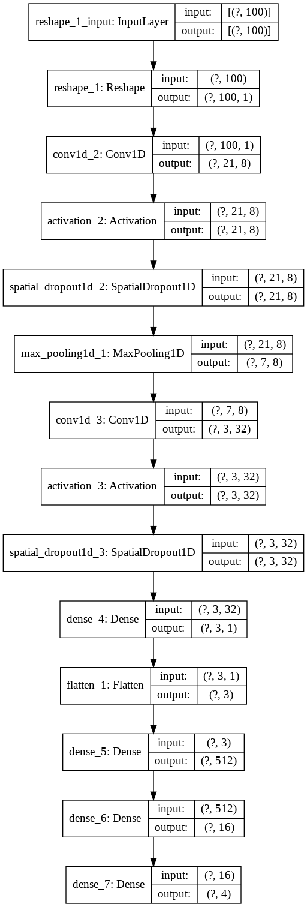

訓練データ：1, 2 検証データ：0 予測データ3
Train on 2362 samples, validate on 1181 samples
Epoch 1/5
2362/2362 [==============================] - 1s 554us/sample - loss: 0.0967 - acc: 0.7506 - val_loss: 0.0623 - val_acc: 0.8586
Epoch 2/5
2362/2362 [==============================] - 0s 200us/sample - loss: 0.0586 - acc: 0.8607 - val_loss: 0.0611 - val_acc: 0.8561
Epoch 3/5
2362/2362 [==============================] - 0s 182us/sample - loss: 0.0564 - acc: 0.8624 - val_loss: 0.0599 - val_acc: 0.8569
Epoch 4/5
2362/2362 [==============================] - 0s 196us/sample - loss: 0.0547 - acc: 0.8654 - val_loss: 0.0587 - val_acc: 0.8577
Epoch 5/5
2362/2362 [==============================] - 0s 192us/sample - loss: 0.0528 - acc: 0.8637 - val_loss: 0.0558 - val_acc: 0.8569
訓練データ：0, 2 検証データ：1 予測データ3
Train on 2362 samples, validate on 1181 samples
Epoch 6/10
2362/2362 [==============================] - 0s 189us/sample - loss: 0.0542 - acc: 0.8645 - val_loss: 0.0472 - val_acc: 0.8696
Epoch 7/10
2362/2362 [=======

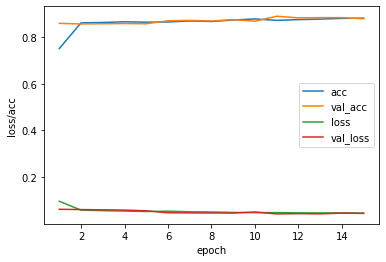

ginza_vec.npy 4dim_1ch mean_squared_error RMSprop
1183/1183 [==============================] - 0s 139us/sample
正答率 87.2% 

訓練データ：2, 3 検証データ：1 予測データ0
Train on 2364 samples, validate on 1181 samples
Epoch 1/5
2364/2364 [==============================] - 1s 537us/sample - loss: 0.0963 - acc: 0.7513 - val_loss: 0.0576 - val_acc: 0.8662
Epoch 2/5
2364/2364 [==============================] - 0s 194us/sample - loss: 0.0592 - acc: 0.8617 - val_loss: 0.0562 - val_acc: 0.8628
Epoch 3/5
2364/2364 [==============================] - 0s 192us/sample - loss: 0.0569 - acc: 0.8621 - val_loss: 0.0564 - val_acc: 0.8654
Epoch 4/5
2364/2364 [==============================] - 0s 205us/sample - loss: 0.0566 - acc: 0.8625 - val_loss: 0.0557 - val_acc: 0.8637
Epoch 5/5
2364/2364 [==============================] - 0s 198us/sample - loss: 0.0563 - acc: 0.8596 - val_loss: 0.0508 - val_acc: 0.8704
訓練データ：1, 3 検証データ：2 予測データ0
Train on 2364 samples, validate on 1181 samples
Epoch 6/10
2364/2364 [======================

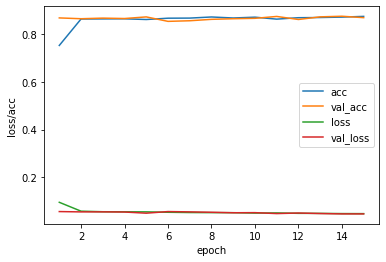

ginza_vec.npy 4dim_1ch mean_squared_error RMSprop
  32/1181 [..............................] - ETA: 2s

Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x7fbd9d62b510>
Traceback (most recent call last):
  File "/usr/lib/python3.6/weakref.py", line 356, in remove
    def remove(k, selfref=ref(self)):
KeyboardInterrupt


1181/1181 [==============================] - 0s 130us/sample
正答率 86.8% 

訓練データ：2, 3 検証データ：0 予測データ1
Train on 2364 samples, validate on 1181 samples
Epoch 1/5
2364/2364 [==============================] - 1s 554us/sample - loss: 0.1090 - acc: 0.6967 - val_loss: 0.0645 - val_acc: 0.8569
Epoch 2/5
2364/2364 [==============================] - 0s 207us/sample - loss: 0.0632 - acc: 0.8553 - val_loss: 0.0633 - val_acc: 0.8510
Epoch 3/5
2364/2364 [==============================] - 0s 192us/sample - loss: 0.0591 - acc: 0.8570 - val_loss: 0.0586 - val_acc: 0.8611
Epoch 4/5
2364/2364 [==============================] - 0s 181us/sample - loss: 0.0569 - acc: 0.8579 - val_loss: 0.0576 - val_acc: 0.8628
Epoch 5/5
2364/2364 [==============================] - 0s 194us/sample - loss: 0.0552 - acc: 0.8608 - val_loss: 0.0599 - val_acc: 0.8552
訓練データ：0, 3 検証データ：2 予測データ1
Train on 2364 samples, validate on 1181 samples
Epoch 6/10
2364/2364 [==============================] - 0s 192us/sample - loss: 0.0563 - acc: 

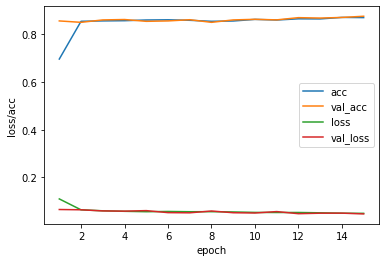

ginza_vec.npy 4dim_1ch mean_squared_error RMSprop
1181/1181 [==============================] - 0s 140us/sample
正答率 87.1% 

訓練データ：1, 3 検証データ：0 予測データ2
Train on 2364 samples, validate on 1181 samples
Epoch 1/5
2364/2364 [==============================] - 1s 555us/sample - loss: 0.1069 - acc: 0.7047 - val_loss: 0.0644 - val_acc: 0.8569
Epoch 2/5
2364/2364 [==============================] - 0s 187us/sample - loss: 0.0597 - acc: 0.8604 - val_loss: 0.0611 - val_acc: 0.8569
Epoch 3/5
2364/2364 [==============================] - 0s 202us/sample - loss: 0.0557 - acc: 0.8646 - val_loss: 0.0628 - val_acc: 0.8450
Epoch 4/5
2364/2364 [==============================] - 0s 198us/sample - loss: 0.0546 - acc: 0.8642 - val_loss: 0.0592 - val_acc: 0.8577
Epoch 5/5
2364/2364 [==============================] - 0s 201us/sample - loss: 0.0546 - acc: 0.8672 - val_loss: 0.0584 - val_acc: 0.8569
訓練データ：0, 3 検証データ：1 予測データ2
Train on 2364 samples, validate on 1181 samples
Epoch 6/10
2364/2364 [======================

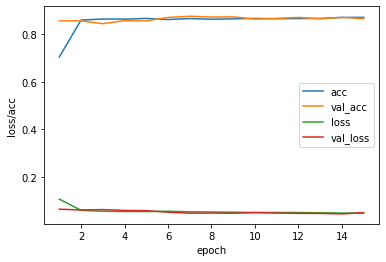

ginza_vec.npy 4dim_1ch mean_squared_error RMSprop
1181/1181 [==============================] - 0s 132us/sample
正答率 86.7% 

[['2dim×1' 'softmax' 'mean_squared_error' 'RMSprop' 'ginza_vec' '87.2%']
 ['2dim×1' 'softmax' 'mean_squared_error' 'RMSprop' 'ginza_vec' '86.8%']
 ['2dim×1' 'softmax' 'mean_squared_error' 'RMSprop' 'ginza_vec' '87.1%']
 ['2dim×1' 'softmax' 'mean_squared_error' 'RMSprop' 'ginza_vec' '86.7%']]
平均：86.95% 最低値：86.7% 最高値：87.2%


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 100, 1)            0         
_________________________________________________________________
conv1d (Conv1D)              (None, 21, 8)             648       
_________________________________________________________________
activation (Activation)      (None, 21, 8)             0         
_________________________________________________________________
spat

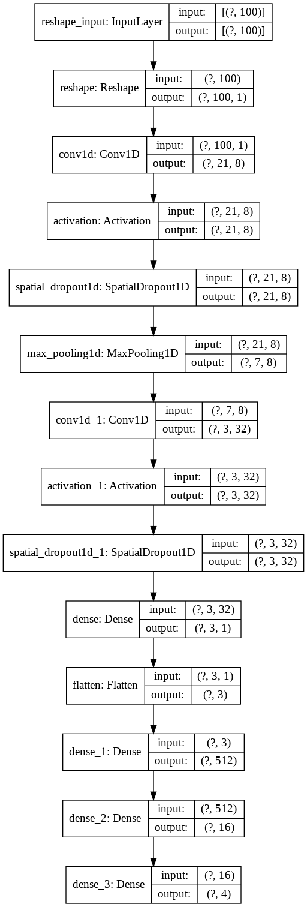

訓練データ：1, 2 検証データ：0 予測データ3
Train on 2362 samples, validate on 1181 samples
Epoch 1/5
2362/2362 [==============================] - 1s 439us/sample - loss: 0.1104 - acc: 0.7362 - val_loss: 0.0635 - val_acc: 0.8603
Epoch 2/5
2362/2362 [==============================] - 0s 191us/sample - loss: 0.0602 - acc: 0.8616 - val_loss: 0.0619 - val_acc: 0.8628
Epoch 3/5
2362/2362 [==============================] - 0s 172us/sample - loss: 0.0581 - acc: 0.8641 - val_loss: 0.0599 - val_acc: 0.8611
Epoch 4/5
2362/2362 [==============================] - 0s 180us/sample - loss: 0.0553 - acc: 0.8616 - val_loss: 0.0615 - val_acc: 0.8527
Epoch 5/5
2362/2362 [==============================] - 0s 183us/sample - loss: 0.0547 - acc: 0.8624 - val_loss: 0.0578 - val_acc: 0.8569
訓練データ：0, 2 検証データ：1 予測データ3
Train on 2362 samples, validate on 1181 samples
Epoch 6/10
2362/2362 [==============================] - 0s 187us/sample - loss: 0.0554 - acc: 0.8607 - val_loss: 0.0498 - val_acc: 0.8721
Epoch 7/10
2362/2362 [=======

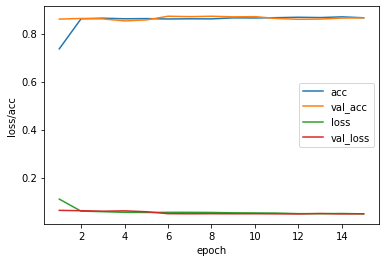

ginza_vec.npy 4dim_1ch mean_squared_error Adam
1183/1183 [==============================] - 0s 143us/sample
正答率 86.5% 

訓練データ：2, 3 検証データ：1 予測データ0
Train on 2364 samples, validate on 1181 samples
Epoch 1/5
2364/2364 [==============================] - 1s 566us/sample - loss: 0.1199 - acc: 0.6764 - val_loss: 0.0587 - val_acc: 0.8645
Epoch 2/5
2364/2364 [==============================] - 0s 208us/sample - loss: 0.0621 - acc: 0.8532 - val_loss: 0.0636 - val_acc: 0.8484
Epoch 3/5
2364/2364 [==============================] - 1s 225us/sample - loss: 0.0583 - acc: 0.8583 - val_loss: 0.0522 - val_acc: 0.8696
Epoch 4/5
2364/2364 [==============================] - 0s 187us/sample - loss: 0.0556 - acc: 0.8613 - val_loss: 0.0511 - val_acc: 0.8713
Epoch 5/5
2364/2364 [==============================] - 0s 172us/sample - loss: 0.0535 - acc: 0.8638 - val_loss: 0.0548 - val_acc: 0.8611
訓練データ：1, 3 検証データ：2 予測データ0
Train on 2364 samples, validate on 1181 samples
Epoch 6/10
2364/2364 [=========================

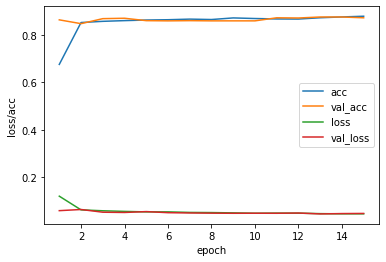

ginza_vec.npy 4dim_1ch mean_squared_error Adam
1181/1181 [==============================] - 0s 140us/sample
正答率 88.2% 

訓練データ：2, 3 検証データ：0 予測データ1
Train on 2364 samples, validate on 1181 samples
Epoch 1/5
2364/2364 [==============================] - 1s 473us/sample - loss: 0.1087 - acc: 0.7119 - val_loss: 0.0642 - val_acc: 0.8577
Epoch 2/5
2364/2364 [==============================] - 0s 175us/sample - loss: 0.0604 - acc: 0.8608 - val_loss: 0.0611 - val_acc: 0.8569
Epoch 3/5
2364/2364 [==============================] - 0s 181us/sample - loss: 0.0567 - acc: 0.8587 - val_loss: 0.0574 - val_acc: 0.8645
Epoch 4/5
2364/2364 [==============================] - 0s 183us/sample - loss: 0.0548 - acc: 0.8617 - val_loss: 0.0570 - val_acc: 0.8645
Epoch 5/5
2364/2364 [==============================] - 1s 238us/sample - loss: 0.0528 - acc: 0.8629 - val_loss: 0.0573 - val_acc: 0.8561
訓練データ：0, 3 検証データ：2 予測データ1
Train on 2364 samples, validate on 1181 samples
Epoch 6/10
2364/2364 [=========================

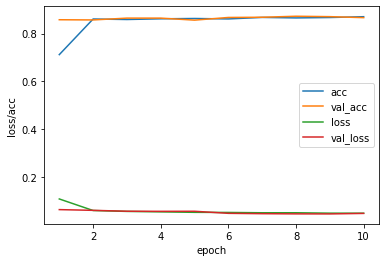

ginza_vec.npy 4dim_1ch mean_squared_error Adam
1181/1181 [==============================] - 0s 131us/sample
正答率 87.1% 

訓練データ：1, 3 検証データ：0 予測データ2
Train on 2364 samples, validate on 1181 samples
Epoch 1/5
2364/2364 [==============================] - 1s 471us/sample - loss: 0.1399 - acc: 0.5973 - val_loss: 0.0980 - val_acc: 0.7909
Epoch 2/5
2364/2364 [==============================] - 0s 184us/sample - loss: 0.0706 - acc: 0.8486 - val_loss: 0.0626 - val_acc: 0.8577
Epoch 3/5
2364/2364 [==============================] - 0s 185us/sample - loss: 0.0583 - acc: 0.8625 - val_loss: 0.0593 - val_acc: 0.8552
Epoch 4/5
2364/2364 [==============================] - 0s 185us/sample - loss: 0.0551 - acc: 0.8638 - val_loss: 0.0582 - val_acc: 0.8577
Epoch 5/5
 864/2364 [=========>....................] - ETA: 0s - loss: 0.0474 - acc: 0.8810error at loss = mean_squared_error, optimizer = Adam
訓練データ：0, 3 検証データ：1 予測データ2
Train on 2364 samples, validate on 1181 samples
Epoch 1/5
2364/2364 [===================

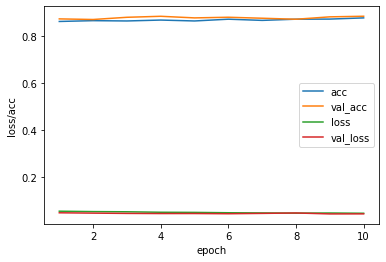

ginza_vec.npy 4dim_1ch mean_squared_error Adam
1181/1181 [==============================] - 0s 132us/sample
正答率 87.5% 

[['2dim×1' 'softmax' 'mean_squared_error' 'Adam' 'ginza_vec' '86.5%']
 ['2dim×1' 'softmax' 'mean_squared_error' 'Adam' 'ginza_vec' '88.2%']
 ['2dim×1' 'softmax' 'mean_squared_error' 'Adam' 'ginza_vec' '87.1%']
 ['2dim×1' 'softmax' 'mean_squared_error' 'Adam' 'ginza_vec' '87.5%']]
平均：87.32499999999999% 最低値：86.5% 最高値：88.2%


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 100, 1)            0         
_________________________________________________________________
conv1d (Conv1D)              (None, 21, 8)             648       
_________________________________________________________________
activation (Activation)      (None, 21, 8)             0         
_________________________________________________________________
spatial

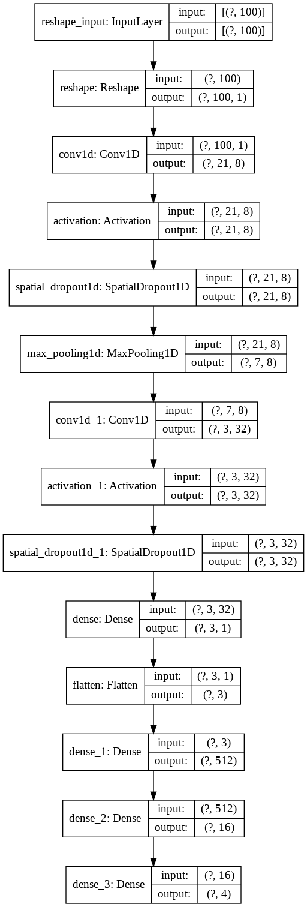

訓練データ：1, 2 検証データ：0 予測データ3
Train on 2362 samples, validate on 1181 samples
Epoch 1/5
2362/2362 [==============================] - 1s 578us/sample - loss: 0.0482 - acc: 0.7413 - val_loss: 0.0312 - val_acc: 0.8561
Epoch 2/5
2362/2362 [==============================] - 0s 208us/sample - loss: 0.0293 - acc: 0.8582 - val_loss: 0.0300 - val_acc: 0.8561
Epoch 3/5
2362/2362 [==============================] - 1s 223us/sample - loss: 0.0276 - acc: 0.8607 - val_loss: 0.0286 - val_acc: 0.8603
Epoch 4/5
2362/2362 [==============================] - 0s 195us/sample - loss: 0.0270 - acc: 0.8620 - val_loss: 0.0281 - val_acc: 0.8603
Epoch 5/5
2362/2362 [==============================] - 0s 191us/sample - loss: 0.0262 - acc: 0.8658 - val_loss: 0.0282 - val_acc: 0.8645
訓練データ：0, 2 検証データ：1 予測データ3
Train on 2362 samples, validate on 1181 samples
Epoch 6/10
2362/2362 [==============================] - 0s 193us/sample - loss: 0.0273 - acc: 0.8599 - val_loss: 0.0240 - val_acc: 0.8704
Epoch 7/10
2362/2362 [=======

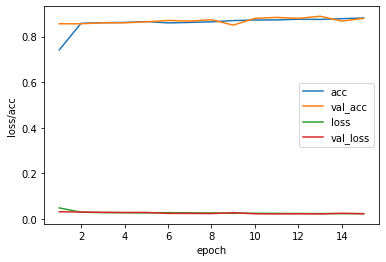

ginza_vec.npy 4dim_1ch mean_squared_logarithmic_error RMSprop
1183/1183 [==============================] - 0s 122us/sample
正答率 87.4% 

訓練データ：2, 3 検証データ：1 予測データ0
Train on 2364 samples, validate on 1181 samples
Epoch 1/5
2364/2364 [==============================] - 2s 680us/sample - loss: 0.0585 - acc: 0.6561 - val_loss: 0.0287 - val_acc: 0.8688
Epoch 2/5
2364/2364 [==============================] - 0s 191us/sample - loss: 0.0296 - acc: 0.8570 - val_loss: 0.0259 - val_acc: 0.8671
Epoch 3/5
2364/2364 [==============================] - 0s 196us/sample - loss: 0.0276 - acc: 0.8587 - val_loss: 0.0264 - val_acc: 0.8679
Epoch 4/5
2364/2364 [==============================] - 0s 204us/sample - loss: 0.0272 - acc: 0.8608 - val_loss: 0.0251 - val_acc: 0.8688
Epoch 5/5
2364/2364 [==============================] - 0s 210us/sample - loss: 0.0264 - acc: 0.8587 - val_loss: 0.0260 - val_acc: 0.8679
訓練データ：1, 3 検証データ：2 予測データ0
Train on 2364 samples, validate on 1181 samples
Epoch 6/10
2364/2364 [==========

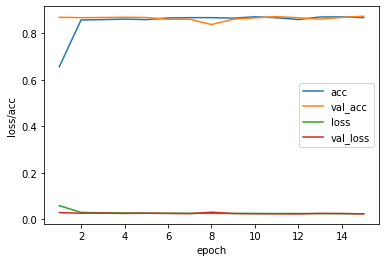

ginza_vec.npy 4dim_1ch mean_squared_logarithmic_error RMSprop
1181/1181 [==============================] - 0s 135us/sample
正答率 87.5% 

訓練データ：2, 3 検証データ：0 予測データ1
Train on 2364 samples, validate on 1181 samples
Epoch 1/5
2364/2364 [==============================] - 1s 542us/sample - loss: 0.0478 - acc: 0.7538 - val_loss: 0.0325 - val_acc: 0.8586
Epoch 2/5
2364/2364 [==============================] - 0s 206us/sample - loss: 0.0309 - acc: 0.8558 - val_loss: 0.0296 - val_acc: 0.8611
Epoch 3/5
2364/2364 [==============================] - 1s 216us/sample - loss: 0.0281 - acc: 0.8651 - val_loss: 0.0288 - val_acc: 0.8594
Epoch 4/5
2364/2364 [==============================] - 0s 204us/sample - loss: 0.0273 - acc: 0.8642 - val_loss: 0.0280 - val_acc: 0.8628
Epoch 5/5
2364/2364 [==============================] - 0s 185us/sample - loss: 0.0266 - acc: 0.8646 - val_loss: 0.0279 - val_acc: 0.8637
訓練データ：0, 3 検証データ：2 予測データ1
Train on 2364 samples, validate on 1181 samples
Epoch 6/10
2364/2364 [==========

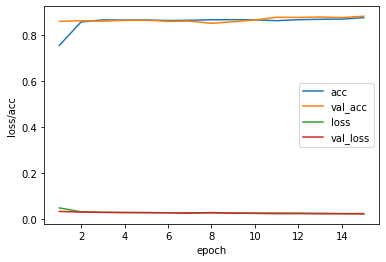

ginza_vec.npy 4dim_1ch mean_squared_logarithmic_error RMSprop
1181/1181 [==============================] - 0s 134us/sample
正答率 87.6% 

訓練データ：1, 3 検証データ：0 予測データ2
Train on 2364 samples, validate on 1181 samples
Epoch 1/5
2364/2364 [==============================] - 1s 563us/sample - loss: 0.0475 - acc: 0.7466 - val_loss: 0.0311 - val_acc: 0.8569
Epoch 2/5
2364/2364 [==============================] - 0s 191us/sample - loss: 0.0297 - acc: 0.8638 - val_loss: 0.0295 - val_acc: 0.8603
Epoch 3/5
2364/2364 [==============================] - 0s 192us/sample - loss: 0.0276 - acc: 0.8693 - val_loss: 0.0288 - val_acc: 0.8611
Epoch 4/5
2364/2364 [==============================] - 1s 214us/sample - loss: 0.0268 - acc: 0.8668 - val_loss: 0.0280 - val_acc: 0.8561
Epoch 5/5
2364/2364 [==============================] - 0s 194us/sample - loss: 0.0255 - acc: 0.8693 - val_loss: 0.0289 - val_acc: 0.8552
訓練データ：0, 3 検証データ：1 予測データ2
Train on 2364 samples, validate on 1181 samples
Epoch 6/10
2364/2364 [==========

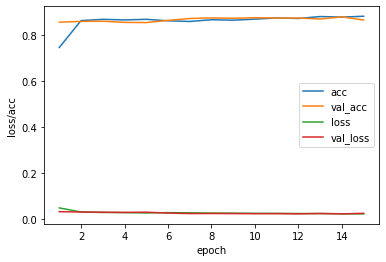

ginza_vec.npy 4dim_1ch mean_squared_logarithmic_error RMSprop
1181/1181 [==============================] - 0s 169us/sample
正答率 87.0% 

[['2dim×1' 'softmax' 'mean_squared_logarithmic_error' 'RMSprop'
  'ginza_vec' '87.4%']
 ['2dim×1' 'softmax' 'mean_squared_logarithmic_error' 'RMSprop'
  'ginza_vec' '87.5%']
 ['2dim×1' 'softmax' 'mean_squared_logarithmic_error' 'RMSprop'
  'ginza_vec' '87.6%']
 ['2dim×1' 'softmax' 'mean_squared_logarithmic_error' 'RMSprop'
  'ginza_vec' '87.0%']]
平均：87.375% 最低値：87.0% 最高値：87.6%


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 100, 1)            0         
_________________________________________________________________
conv1d (Conv1D)              (None, 21, 8)             648       
_________________________________________________________________
activation (Activation)      (None, 21, 8)             0         
_

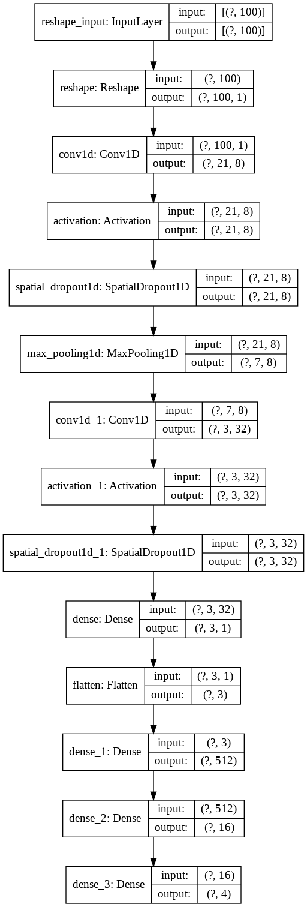

訓練データ：1, 2 検証データ：0 予測データ3
Train on 2362 samples, validate on 1181 samples
Epoch 1/5
2362/2362 [==============================] - 2s 896us/sample - loss: 0.0554 - acc: 0.7045 - val_loss: 0.0284 - val_acc: 0.8493
Epoch 2/5
2362/2362 [==============================] - 1s 245us/sample - loss: 0.0265 - acc: 0.8599 - val_loss: 0.0281 - val_acc: 0.8484
Epoch 3/5
2362/2362 [==============================] - 1s 280us/sample - loss: 0.0253 - acc: 0.8586 - val_loss: 0.0269 - val_acc: 0.8620
Epoch 4/5
2362/2362 [==============================] - 1s 316us/sample - loss: 0.0248 - acc: 0.8654 - val_loss: 0.0285 - val_acc: 0.8484
Epoch 5/5
2362/2362 [==============================] - 1s 233us/sample - loss: 0.0247 - acc: 0.8620 - val_loss: 0.0261 - val_acc: 0.8586
訓練データ：0, 2 検証データ：1 予測データ3
Train on 2362 samples, validate on 1181 samples
Epoch 6/10
2362/2362 [==============================] - 1s 215us/sample - loss: 0.0256 - acc: 0.8556 - val_loss: 0.0225 - val_acc: 0.8713
Epoch 7/10
2362/2362 [=======

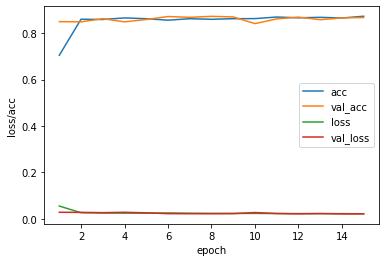

ginza_vec.npy 4dim_1ch logcosh Nadam
1183/1183 [==============================] - 0s 149us/sample
正答率 86.9% 

訓練データ：2, 3 検証データ：1 予測データ0
Train on 2364 samples, validate on 1181 samples
Epoch 1/5
2364/2364 [==============================] - 2s 810us/sample - loss: 0.0569 - acc: 0.6591 - val_loss: 0.0270 - val_acc: 0.8679
Epoch 2/5
2364/2364 [==============================] - 1s 234us/sample - loss: 0.0281 - acc: 0.8583 - val_loss: 0.0254 - val_acc: 0.8721
Epoch 3/5
2364/2364 [==============================] - 1s 237us/sample - loss: 0.0269 - acc: 0.8638 - val_loss: 0.0255 - val_acc: 0.8671
Epoch 4/5
2364/2364 [==============================] - 1s 230us/sample - loss: 0.0260 - acc: 0.8646 - val_loss: 0.0242 - val_acc: 0.8721
Epoch 5/5
2364/2364 [==============================] - 1s 239us/sample - loss: 0.0252 - acc: 0.8629 - val_loss: 0.0237 - val_acc: 0.8713
訓練データ：1, 3 検証データ：2 予測データ0
Train on 2364 samples, validate on 1181 samples
Epoch 6/10
2364/2364 [==============================] - 1

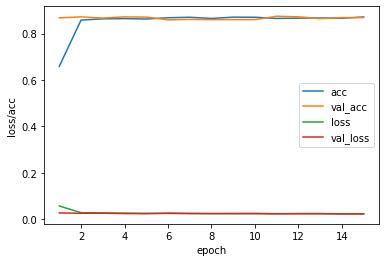

ginza_vec.npy 4dim_1ch logcosh Nadam
1181/1181 [==============================] - 0s 128us/sample
正答率 86.3% 

訓練データ：2, 3 検証データ：0 予測データ1
Train on 2364 samples, validate on 1181 samples
Epoch 1/5
2364/2364 [==============================] - 2s 715us/sample - loss: 0.0548 - acc: 0.6726 - val_loss: 0.0284 - val_acc: 0.8594
Epoch 2/5
2364/2364 [==============================] - 1s 223us/sample - loss: 0.0280 - acc: 0.8583 - val_loss: 0.0288 - val_acc: 0.8544
Epoch 3/5
2364/2364 [==============================] - 1s 237us/sample - loss: 0.0264 - acc: 0.8613 - val_loss: 0.0264 - val_acc: 0.8586
Epoch 4/5
2364/2364 [==============================] - 1s 231us/sample - loss: 0.0254 - acc: 0.8617 - val_loss: 0.0268 - val_acc: 0.8544
Epoch 5/5
2364/2364 [==============================] - 1s 233us/sample - loss: 0.0246 - acc: 0.8625 - val_loss: 0.0257 - val_acc: 0.8611
訓練データ：0, 3 検証データ：2 予測データ1
Train on 2364 samples, validate on 1181 samples
Epoch 6/10
2364/2364 [==============================] - 1

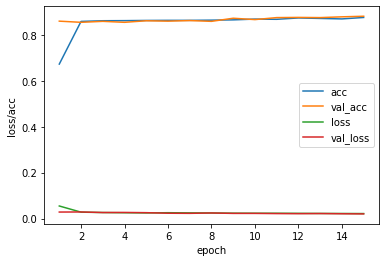

ginza_vec.npy 4dim_1ch logcosh Nadam
1181/1181 [==============================] - 0s 124us/sample
正答率 87.0% 

訓練データ：1, 3 検証データ：0 予測データ2
Train on 2364 samples, validate on 1181 samples
Epoch 1/5
2364/2364 [==============================] - 2s 824us/sample - loss: 0.0554 - acc: 0.6349 - val_loss: 0.0303 - val_acc: 0.8501
Epoch 2/5
2364/2364 [==============================] - 1s 227us/sample - loss: 0.0274 - acc: 0.8642 - val_loss: 0.0282 - val_acc: 0.8594
Epoch 3/5
2364/2364 [==============================] - 1s 239us/sample - loss: 0.0265 - acc: 0.8668 - val_loss: 0.0275 - val_acc: 0.8637
Epoch 4/5
2364/2364 [==============================] - 1s 223us/sample - loss: 0.0261 - acc: 0.8676 - val_loss: 0.0269 - val_acc: 0.8594
Epoch 5/5
2364/2364 [==============================] - 1s 214us/sample - loss: 0.0246 - acc: 0.8693 - val_loss: 0.0259 - val_acc: 0.8628
訓練データ：0, 3 検証データ：1 予測データ2
Train on 2364 samples, validate on 1181 samples
Epoch 6/10
2364/2364 [==============================] - 1

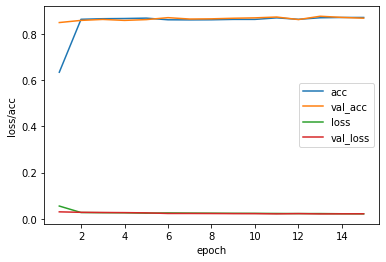

ginza_vec.npy 4dim_1ch logcosh Nadam
1181/1181 [==============================] - 0s 132us/sample
正答率 87.1% 

[['2dim×1' 'softmax' 'logcosh' 'Nadam' 'ginza_vec' '86.9%']
 ['2dim×1' 'softmax' 'logcosh' 'Nadam' 'ginza_vec' '86.3%']
 ['2dim×1' 'softmax' 'logcosh' 'Nadam' 'ginza_vec' '87.0%']
 ['2dim×1' 'softmax' 'logcosh' 'Nadam' 'ginza_vec' '87.1%']]
平均：86.82499999999999% 最低値：86.3% 最高値：87.1%


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 100, 1)            0         
_________________________________________________________________
conv1d (Conv1D)              (None, 21, 8)             648       
_________________________________________________________________
activation (Activation)      (None, 21, 8)             0         
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 21, 8)             0 

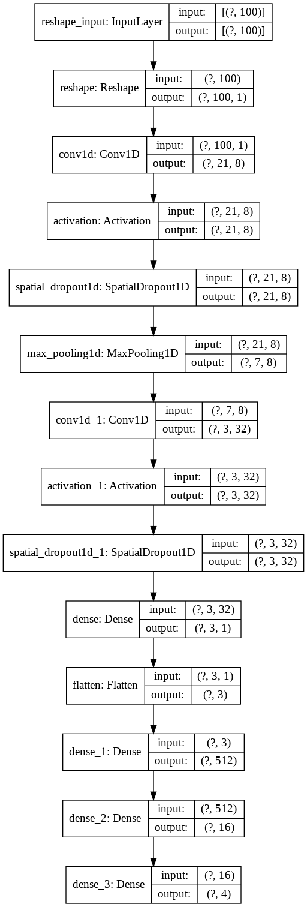

訓練データ：1, 2 検証データ：0 予測データ3
Train on 2362 samples, validate on 1181 samples
Epoch 1/5
2362/2362 [==============================] - 1s 534us/sample - loss: 0.4586 - acc: 0.7876 - val_loss: 0.4027 - val_acc: 0.8271
Epoch 2/5
2362/2362 [==============================] - 0s 175us/sample - loss: 0.3398 - acc: 0.8648 - val_loss: 0.2598 - val_acc: 0.9272
Epoch 3/5
2362/2362 [==============================] - 0s 176us/sample - loss: 0.2317 - acc: 0.9291 - val_loss: 0.2262 - val_acc: 0.9287
Epoch 4/5
2362/2362 [==============================] - 0s 185us/sample - loss: 0.2130 - acc: 0.9327 - val_loss: 0.2150 - val_acc: 0.9304
Epoch 5/5
2362/2362 [==============================] - 0s 188us/sample - loss: 0.2024 - acc: 0.9342 - val_loss: 0.2105 - val_acc: 0.9301
訓練データ：0, 2 検証データ：1 予測データ3
Train on 2362 samples, validate on 1181 samples
Epoch 6/10
2362/2362 [==============================] - 0s 206us/sample - loss: 0.2057 - acc: 0.9320 - val_loss: 0.1837 - val_acc: 0.9384
Epoch 7/10
2362/2362 [=======

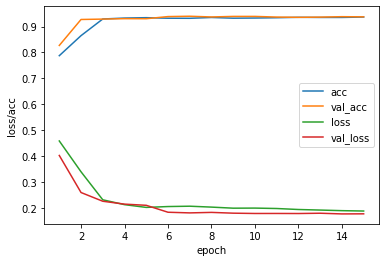

ginza_vec.npy 4dim_1ch binary_crossentropy Adamax
1183/1183 [==============================] - 0s 127us/sample
正答率 86.3% 

訓練データ：2, 3 検証データ：1 予測データ0
Train on 2364 samples, validate on 1181 samples
Epoch 1/5
2364/2364 [==============================] - 1s 488us/sample - loss: 0.4303 - acc: 0.8080 - val_loss: 0.2943 - val_acc: 0.9183
Epoch 2/5
2364/2364 [==============================] - 0s 188us/sample - loss: 0.2576 - acc: 0.9230 - val_loss: 0.2082 - val_acc: 0.9361
Epoch 3/5
2364/2364 [==============================] - 0s 180us/sample - loss: 0.2243 - acc: 0.9278 - val_loss: 0.1969 - val_acc: 0.9367
Epoch 4/5
2364/2364 [==============================] - 0s 195us/sample - loss: 0.2099 - acc: 0.9308 - val_loss: 0.1928 - val_acc: 0.9378
Epoch 5/5
2364/2364 [==============================] - 0s 175us/sample - loss: 0.2064 - acc: 0.9317 - val_loss: 0.1871 - val_acc: 0.9365
訓練データ：1, 3 検証データ：2 予測データ0
Train on 2364 samples, validate on 1181 samples
Epoch 6/10
2364/2364 [======================

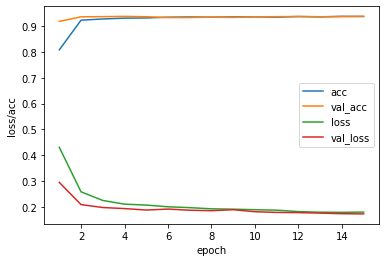

ginza_vec.npy 4dim_1ch binary_crossentropy Adamax
1181/1181 [==============================] - 0s 140us/sample
正答率 85.7% 

訓練データ：2, 3 検証データ：0 予測データ1
Train on 2364 samples, validate on 1181 samples
Epoch 1/5
2364/2364 [==============================] - 1s 488us/sample - loss: 0.4581 - acc: 0.7825 - val_loss: 0.4022 - val_acc: 0.8038
Epoch 2/5
2364/2364 [==============================] - 0s 180us/sample - loss: 0.3581 - acc: 0.8442 - val_loss: 0.2882 - val_acc: 0.9005
Epoch 3/5
2364/2364 [==============================] - 1s 215us/sample - loss: 0.2605 - acc: 0.9194 - val_loss: 0.2285 - val_acc: 0.9287
Epoch 4/5
2364/2364 [==============================] - 1s 244us/sample - loss: 0.2315 - acc: 0.9278 - val_loss: 0.2183 - val_acc: 0.9299
Epoch 5/5
2364/2364 [==============================] - 0s 188us/sample - loss: 0.2136 - acc: 0.9291 - val_loss: 0.2125 - val_acc: 0.9297
訓練データ：0, 3 検証データ：2 予測データ1
Train on 2364 samples, validate on 1181 samples
Epoch 6/10
2364/2364 [======================

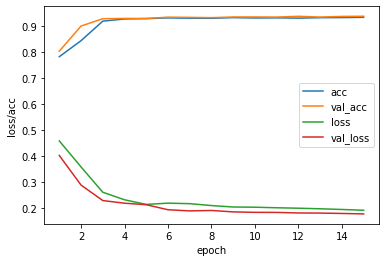

ginza_vec.npy 4dim_1ch binary_crossentropy Adamax
1181/1181 [==============================] - 0s 132us/sample
正答率 87.0% 

訓練データ：1, 3 検証データ：0 予測データ2
Train on 2364 samples, validate on 1181 samples
Epoch 1/5
2364/2364 [==============================] - 1s 525us/sample - loss: 0.4603 - acc: 0.7830 - val_loss: 0.4087 - val_acc: 0.8019
Epoch 2/5
2364/2364 [==============================] - 1s 235us/sample - loss: 0.3763 - acc: 0.8372 - val_loss: 0.3474 - val_acc: 0.8537
Epoch 3/5
2364/2364 [==============================] - 0s 191us/sample - loss: 0.3262 - acc: 0.8642 - val_loss: 0.2969 - val_acc: 0.8677
Epoch 4/5
2364/2364 [==============================] - 0s 172us/sample - loss: 0.2793 - acc: 0.8916 - val_loss: 0.2563 - val_acc: 0.9280
Epoch 5/5
2364/2364 [==============================] - 0s 183us/sample - loss: 0.2387 - acc: 0.9270 - val_loss: 0.2342 - val_acc: 0.9276
訓練データ：0, 3 検証データ：1 予測データ2
Train on 2364 samples, validate on 1181 samples
Epoch 6/10
2364/2364 [======================

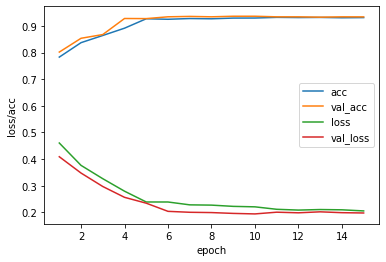

ginza_vec.npy 4dim_1ch binary_crossentropy Adamax
1181/1181 [==============================] - 0s 132us/sample
正答率 85.5% 

[['2dim×1' 'softmax' 'binary_crossentropy' 'Adamax' 'ginza_vec' '86.3%']
 ['2dim×1' 'softmax' 'binary_crossentropy' 'Adamax' 'ginza_vec' '85.7%']
 ['2dim×1' 'softmax' 'binary_crossentropy' 'Adamax' 'ginza_vec' '87.0%']
 ['2dim×1' 'softmax' 'binary_crossentropy' 'Adamax' 'ginza_vec' '85.5%']]
平均：86.125% 最低値：85.5% 最高値：87.0%


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 100, 1)            0         
_________________________________________________________________
conv1d (Conv1D)              (None, 21, 8)             648       
_________________________________________________________________
activation (Activation)      (None, 21, 8)             0         
_________________________________________________________________
spa

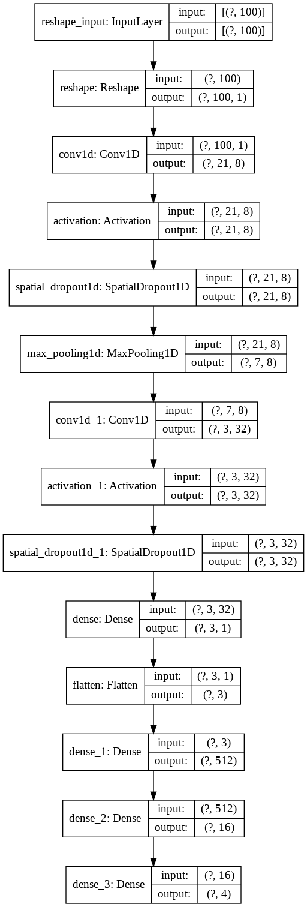

訓練データ：1, 2 検証データ：0 予測データ3
Train on 2362 samples, validate on 1181 samples
Epoch 1/5
2362/2362 [==============================] - 2s 736us/sample - loss: 0.3531 - acc: 0.8532 - val_loss: 0.2533 - val_acc: 0.9299
Epoch 2/5
2362/2362 [==============================] - 1s 221us/sample - loss: 0.2213 - acc: 0.9318 - val_loss: 0.2166 - val_acc: 0.9304
Epoch 3/5
2362/2362 [==============================] - 1s 244us/sample - loss: 0.1996 - acc: 0.9333 - val_loss: 0.2052 - val_acc: 0.9310
Epoch 4/5
2362/2362 [==============================] - 1s 221us/sample - loss: 0.1941 - acc: 0.9348 - val_loss: 0.1965 - val_acc: 0.9310
Epoch 5/5
2362/2362 [==============================] - 1s 242us/sample - loss: 0.1878 - acc: 0.9367 - val_loss: 0.2012 - val_acc: 0.9335
訓練データ：0, 2 検証データ：1 予測データ3
Train on 2362 samples, validate on 1181 samples
Epoch 6/10
2362/2362 [==============================] - 1s 227us/sample - loss: 0.1941 - acc: 0.9341 - val_loss: 0.1704 - val_acc: 0.9407
Epoch 7/10
2362/2362 [=======

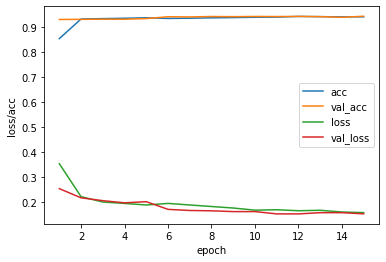

ginza_vec.npy 4dim_1ch binary_crossentropy Nadam
1183/1183 [==============================] - 0s 139us/sample
正答率 86.9% 

訓練データ：2, 3 検証データ：1 予測データ0
Train on 2364 samples, validate on 1181 samples
Epoch 1/5
2364/2364 [==============================] - 2s 865us/sample - loss: 0.4047 - acc: 0.8227 - val_loss: 0.2574 - val_acc: 0.9253
Epoch 2/5
2364/2364 [==============================] - 1s 245us/sample - loss: 0.2340 - acc: 0.9258 - val_loss: 0.1918 - val_acc: 0.9365
Epoch 3/5
2364/2364 [==============================] - 1s 240us/sample - loss: 0.1992 - acc: 0.9332 - val_loss: 0.1841 - val_acc: 0.9376
Epoch 4/5
2364/2364 [==============================] - 1s 235us/sample - loss: 0.1942 - acc: 0.9328 - val_loss: 0.1778 - val_acc: 0.9378
Epoch 5/5
2364/2364 [==============================] - 1s 250us/sample - loss: 0.1836 - acc: 0.9361 - val_loss: 0.1758 - val_acc: 0.9376
訓練データ：1, 3 検証データ：2 予測データ0
Train on 2364 samples, validate on 1181 samples
Epoch 6/10
2364/2364 [=======================

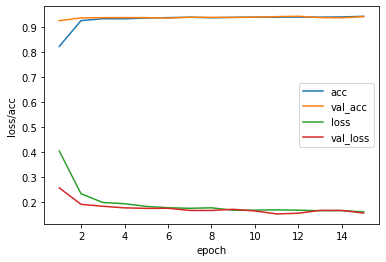

ginza_vec.npy 4dim_1ch binary_crossentropy Nadam
1181/1181 [==============================] - 0s 125us/sample
正答率 86.6% 

訓練データ：2, 3 検証データ：0 予測データ1
Train on 2364 samples, validate on 1181 samples
Epoch 1/5
2364/2364 [==============================] - 2s 712us/sample - loss: 0.3998 - acc: 0.8267 - val_loss: 0.2311 - val_acc: 0.9289
Epoch 2/5
2364/2364 [==============================] - 1s 238us/sample - loss: 0.2166 - acc: 0.9304 - val_loss: 0.2082 - val_acc: 0.9308
Epoch 3/5
2364/2364 [==============================] - 1s 248us/sample - loss: 0.1992 - acc: 0.9318 - val_loss: 0.1960 - val_acc: 0.9325
Epoch 4/5
2364/2364 [==============================] - 1s 227us/sample - loss: 0.1903 - acc: 0.9339 - val_loss: 0.1908 - val_acc: 0.9354
Epoch 5/5
2364/2364 [==============================] - 1s 230us/sample - loss: 0.1814 - acc: 0.9375 - val_loss: 0.1960 - val_acc: 0.9320
訓練データ：0, 3 検証データ：2 予測データ1
Train on 2364 samples, validate on 1181 samples
Epoch 6/10
2364/2364 [=======================

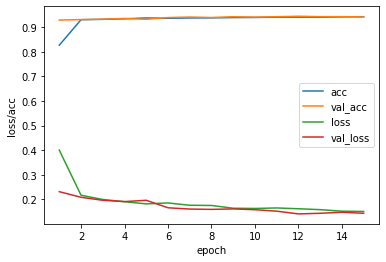

ginza_vec.npy 4dim_1ch binary_crossentropy Nadam
1181/1181 [==============================] - 0s 130us/sample
正答率 87.6% 

訓練データ：1, 3 検証データ：0 予測データ2
Train on 2364 samples, validate on 1181 samples
Epoch 1/5
2364/2364 [==============================] - 2s 731us/sample - loss: 0.3566 - acc: 0.8553 - val_loss: 0.2333 - val_acc: 0.9301
Epoch 2/5
2364/2364 [==============================] - 1s 227us/sample - loss: 0.2127 - acc: 0.9333 - val_loss: 0.2288 - val_acc: 0.9259
Epoch 3/5
2364/2364 [==============================] - 1s 228us/sample - loss: 0.1976 - acc: 0.9350 - val_loss: 0.2040 - val_acc: 0.9323
Epoch 4/5
2364/2364 [==============================] - 1s 226us/sample - loss: 0.1899 - acc: 0.9371 - val_loss: 0.2167 - val_acc: 0.9253
Epoch 5/5
2364/2364 [==============================] - 1s 237us/sample - loss: 0.1811 - acc: 0.9381 - val_loss: 0.1895 - val_acc: 0.9352
訓練データ：0, 3 検証データ：1 予測データ2
Train on 2364 samples, validate on 1181 samples
Epoch 6/10
2364/2364 [=======================

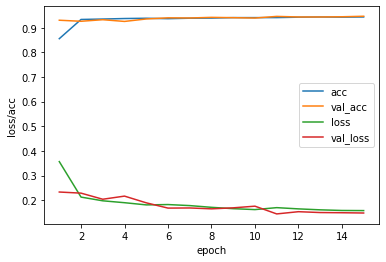

ginza_vec.npy 4dim_1ch binary_crossentropy Nadam
1181/1181 [==============================] - 0s 133us/sample
正答率 87.1% 

[['2dim×1' 'softmax' 'binary_crossentropy' 'Nadam' 'ginza_vec' '86.9%']
 ['2dim×1' 'softmax' 'binary_crossentropy' 'Nadam' 'ginza_vec' '86.6%']
 ['2dim×1' 'softmax' 'binary_crossentropy' 'Nadam' 'ginza_vec' '87.6%']
 ['2dim×1' 'softmax' 'binary_crossentropy' 'Nadam' 'ginza_vec' '87.1%']]
平均：87.05000000000001% 最低値：86.6% 最高値：87.6%


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 100, 1)            0         
_________________________________________________________________
conv1d (Conv1D)              (None, 21, 8)             648       
_________________________________________________________________
activation (Activation)      (None, 21, 8)             0         
_______________________________________________________________

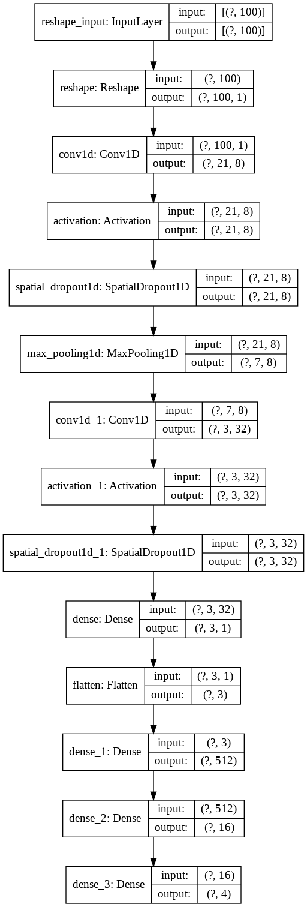

訓練データ：1, 2 検証データ：0 予測データ3
Train on 2362 samples, validate on 1181 samples
Epoch 1/5
2362/2362 [==============================] - 2s 866us/sample - loss: 0.4677 - acc: 0.6859 - val_loss: 0.3850 - val_acc: 0.8577
Epoch 2/5
2362/2362 [==============================] - 1s 238us/sample - loss: 0.3737 - acc: 0.8599 - val_loss: 0.3700 - val_acc: 0.8603
Epoch 3/5
2362/2362 [==============================] - 1s 249us/sample - loss: 0.3653 - acc: 0.8624 - val_loss: 0.3653 - val_acc: 0.8594
Epoch 4/5
2362/2362 [==============================] - 1s 307us/sample - loss: 0.3618 - acc: 0.8594 - val_loss: 0.3626 - val_acc: 0.8628
Epoch 5/5
2362/2362 [==============================] - 1s 269us/sample - loss: 0.3583 - acc: 0.8624 - val_loss: 0.3599 - val_acc: 0.8603
訓練データ：0, 2 検証データ：1 予測データ3
Train on 2362 samples, validate on 1181 samples
Epoch 6/10
2362/2362 [==============================] - 1s 239us/sample - loss: 0.3591 - acc: 0.8611 - val_loss: 0.3513 - val_acc: 0.8654
Epoch 7/10
2362/2362 [=======

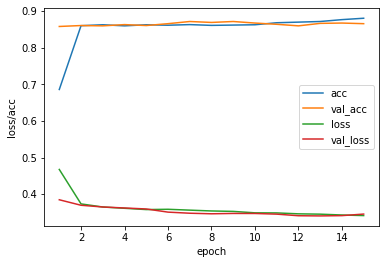

ginza_vec.npy 4dim_1ch poisson Nadam
1183/1183 [==============================] - 0s 124us/sample
正答率 85.7% 

訓練データ：2, 3 検証データ：1 予測データ0
Train on 2364 samples, validate on 1181 samples
Epoch 1/5
2364/2364 [==============================] - 2s 755us/sample - loss: 0.4818 - acc: 0.6671 - val_loss: 0.3772 - val_acc: 0.8586
Epoch 2/5
2364/2364 [==============================] - 1s 234us/sample - loss: 0.3796 - acc: 0.8562 - val_loss: 0.3638 - val_acc: 0.8645
Epoch 3/5
2364/2364 [==============================] - 1s 214us/sample - loss: 0.3693 - acc: 0.8625 - val_loss: 0.3590 - val_acc: 0.8688
Epoch 4/5
2364/2364 [==============================] - 0s 211us/sample - loss: 0.3634 - acc: 0.8634 - val_loss: 0.3572 - val_acc: 0.8679
Epoch 5/5
2364/2364 [==============================] - 1s 245us/sample - loss: 0.3622 - acc: 0.8596 - val_loss: 0.3571 - val_acc: 0.8679
訓練データ：1, 3 検証データ：2 予測データ0
Train on 2364 samples, validate on 1181 samples
Epoch 6/10
2364/2364 [==============================] - 1

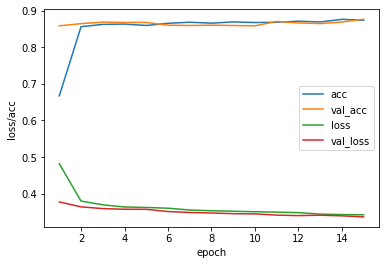

ginza_vec.npy 4dim_1ch poisson Nadam
1181/1181 [==============================] - 0s 135us/sample
正答率 88.5% 

訓練データ：2, 3 検証データ：0 予測データ1
Train on 2364 samples, validate on 1181 samples
Epoch 1/5
2364/2364 [==============================] - 2s 688us/sample - loss: 0.4493 - acc: 0.7458 - val_loss: 0.3751 - val_acc: 0.8586
Epoch 2/5
2364/2364 [==============================] - 1s 218us/sample - loss: 0.3687 - acc: 0.8613 - val_loss: 0.3769 - val_acc: 0.8518
Epoch 3/5
2364/2364 [==============================] - 1s 223us/sample - loss: 0.3646 - acc: 0.8621 - val_loss: 0.3622 - val_acc: 0.8594
Epoch 4/5
2364/2364 [==============================] - 1s 214us/sample - loss: 0.3597 - acc: 0.8587 - val_loss: 0.3619 - val_acc: 0.8577
Epoch 5/5
2364/2364 [==============================] - 1s 229us/sample - loss: 0.3580 - acc: 0.8625 - val_loss: 0.3625 - val_acc: 0.8611
訓練データ：0, 3 検証データ：2 予測データ1
Train on 2364 samples, validate on 1181 samples
Epoch 6/10
2364/2364 [==============================] - 1

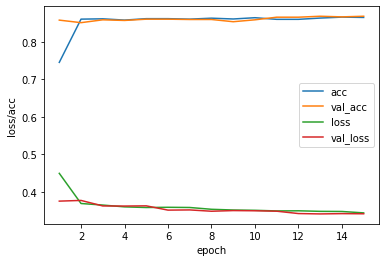

ginza_vec.npy 4dim_1ch poisson Nadam
1181/1181 [==============================] - 0s 141us/sample
正答率 87.2% 

訓練データ：1, 3 検証データ：0 予測データ2
Train on 2364 samples, validate on 1181 samples
Epoch 1/5
2364/2364 [==============================] - 2s 830us/sample - loss: 0.4894 - acc: 0.6523 - val_loss: 0.3938 - val_acc: 0.8577
Epoch 2/5
2364/2364 [==============================] - 1s 222us/sample - loss: 0.3743 - acc: 0.8625 - val_loss: 0.3697 - val_acc: 0.8577
Epoch 3/5
2364/2364 [==============================] - 1s 215us/sample - loss: 0.3616 - acc: 0.8659 - val_loss: 0.3720 - val_acc: 0.8535
Epoch 4/5
2364/2364 [==============================] - 1s 238us/sample - loss: 0.3582 - acc: 0.8663 - val_loss: 0.3635 - val_acc: 0.8577
Epoch 5/5
2364/2364 [==============================] - 1s 229us/sample - loss: 0.3554 - acc: 0.8663 - val_loss: 0.3607 - val_acc: 0.8535
訓練データ：0, 3 検証データ：1 予測データ2
Train on 2364 samples, validate on 1181 samples
Epoch 6/10
2364/2364 [==============================] - 1

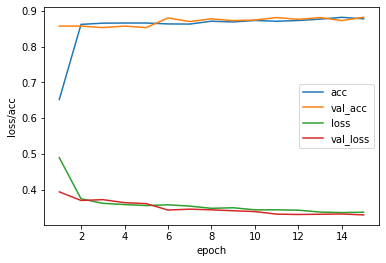

ginza_vec.npy 4dim_1ch poisson Nadam
1181/1181 [==============================] - 0s 124us/sample
正答率 87.6% 

[['2dim×1' 'softmax' 'poisson' 'Nadam' 'ginza_vec' '85.7%']
 ['2dim×1' 'softmax' 'poisson' 'Nadam' 'ginza_vec' '88.5%']
 ['2dim×1' 'softmax' 'poisson' 'Nadam' 'ginza_vec' '87.2%']
 ['2dim×1' 'softmax' 'poisson' 'Nadam' 'ginza_vec' '87.6%']]
平均：87.25% 最低値：85.7% 最高値：88.5%

[['2dim×1' 'softmax' 'mean_squared_error' 'RMSprop' 'ginza_vec' '87.2%']
 ['2dim×1' 'softmax' 'mean_squared_error' 'RMSprop' 'ginza_vec' '86.8%']
 ['2dim×1' 'softmax' 'mean_squared_error' 'RMSprop' 'ginza_vec' '87.1%']
 ['2dim×1' 'softmax' 'mean_squared_error' 'RMSprop' 'ginza_vec' '86.7%']
 ['2dim×1' 'softmax' 'mean_squared_error' 'Adam' 'ginza_vec' '86.5%']
 ['2dim×1' 'softmax' 'mean_squared_error' 'Adam' 'ginza_vec' '88.2%']
 ['2dim×1' 'softmax' 'mean_squared_error' 'Adam' 'ginza_vec' '87.1%']
 ['2dim×1' 'softmax' 'mean_squared_error' 'Adam' 'ginza_vec' '87.5%']
 ['2dim×1' 'softmax' 'mean_squared_logarithmic

In [0]:
# 出力4次元×1 softmax   

%tensorflow_version 2.x
import tensorflow as tf
print('tf.version', tf.__version__)
from tensorflow.keras import losses
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Embedding, Reshape, Conv1D, Activation
from tensorflow.keras.layers import SpatialDropout1D, MaxPooling1D, Dense, Flatten
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from PIL import Image
from IPython.core.display import display
import numpy as np
import csv

class NN:


  def Return_model(model, input_dim, No_):
    # 生成したネットワーク図の表示
    if No_ == 0:
      print()
      model.summary()
      plot_model(model, 
                to_file='data/network/NN_DrctIn_'+str(input_dim)+'d_2LConv1D_2dOutsft.png', 
                show_shapes=True)
      im = Image.open('data/network/NN_DrctIn_'+str(input_dim)+'d_2LConv1D_2dOutsft.png')
      im_resize = im.resize(size=(int(im.width*coef), int(im.height*coef)))
      display(im_resize)

    return model


  def DrctIn_2LConv1D_4dOut_softmax(input_dim, No_):
    model = Sequential([
                        Reshape((input_dim, 1), input_shape=(input_dim,)),
                        Conv1D(8, kernel_size=5),
                        Activation('relu'),
                        SpatialDropout1D(0.2),
                        MaxPooling1D(pool_size=3),
                        Conv1D(32, kernel_size=5),
                        Activation('relu'),
                        SpatialDropout1D(0.2),
                        Dense(1, activation='relu'),
                        Flatten(),
                        Dense(512, activation='relu'),
                        Dense(16, activation='relu'),
                        Dense(4, activation='softmax')
                        ])
    return model


  def EmbedIn_2LConv1D_4dOut_softmax(input_dim, IDmax, No_):
    if input_dim >= 300:
      model = Sequential([
                          Embedding(IDmax+1, 16, input_length=input_dim),
                          Conv1D(8, kernel_size=5),
                          Activation('relu'),
                          SpatialDropout1D(0.2),
                          MaxPooling1D(pool_size=3),
                          Conv1D(32, kernel_size=5),
                          Activation('relu'),
                          SpatialDropout1D(0.2),
                          #Dense(1, activation='relu'),
                          Flatten(),
                          Dense(512, activation='relu'),
                          Dense(16, activation='relu'),
                          Dense(4, activation='softmax')
                          ])
    else:
      model = Sequential([
                          Embedding(IDmax+1, 16, input_length=input_dim),
                          Conv1D(8, kernel_size=5),
                          Activation('relu'),
                          SpatialDropout1D(0.2),
                          #MaxPooling1D(pool_size=3),
                          Conv1D(32, kernel_size=5),
                          Activation('relu'),
                          SpatialDropout1D(0.2),
                          #Dense(1, activation='relu'),
                          Flatten(),
                          Dense(512, activation='relu'),
                          Dense(16, activation='relu'),
                          Dense(4, activation='softmax')
                          ])
    return model


files = ['x_count_MeCab.npy', 'x_count_sentencepiece.npy', 'x_count_TExMeCab.npy', 
         'x_count_TermExtract.npy', 'x_count_ginza.npy', 'x_count_entginza.npy', 
         'x_tfidf_MeCab.npy', 'x_tfidf_sentencepiece.npy', 'x_tfidf_TExMeCab.npy', 
         'x_tfidf_TermExtract.npy', 'x_tfidf_ginza.npy', 'x_tfidf_entginza.npy'#, 
         'x_number_MeCab.npy', 'x_number_sentencepiece.npy', 'x_number_TExMeCab.npy', 
         'x_number_TermExtract.npy', 'x_number_ginza.npy', 'x_number_entginza.npy', 
         'x_doc2vec_dm0_MeCab.npy', 'x_doc2vec_dm0_sentencepiece.npy', 
         'x_doc2vec_dm0_MeCab+TermExtract.npy', 'x_doc2vec_dm0_TermExtract.npy', 
         'x_doc2vec_dm1_MeCab.npy', 'x_doc2vec_dm1_sentencepiece.npy', 
         'x_doc2vec_dm1_MeCab+TermExtract.npy',  'x_doc2vec_dm1_TermExtract.npy', 
         'ginza_vec.npy'
         ]

acquisition = [[[1, 2, 0, 3], [0, 2, 1, 3], [0, 1, 2, 3]], 
               [[2, 3, 1, 0], [1, 3, 2, 0], [1, 2, 3, 0]], 
               [[2, 3, 0, 1], [0, 3, 2, 1], [0, 2, 3, 1]], 
               [[1, 3, 0, 2], [0, 3, 1, 2], [0, 1, 3, 2]]
               ]

batch_size = 32
epochs = 5
coef = .6 #ネットワーク図の拡大率

conditions = [['mean_squared_error', 'RMSprop'], ['mean_squared_error', 'Adam'], 
              ['mean_squared_logarithmic_error', 'RMSprop'], ['logcosh', 'Nadam'], 
              ['binary_crossentropy', 'Adamax'], ['binary_crossentropy', 'Nadam'], 
              ['poisson', 'Nadam']]

metrics = ['acc']

y_ = category
result = []

for file in files:
  print(file.replace('.npy', '')+'の4値分類を開始')
  x_ = np.load('data/'+file)
  index = np.random.permutation(np.arange(len(x_)))
  
  # 学習
  print()
  div = len(x_)//4
  x_immd0, y_immd0 = x_[index[:div]], y_[index[:div]]
  x_immd1, y_immd1 = x_[index[div:div*2]], y_[index[div:div*2]]
  x_immd2, y_immd2 = x_[index[div*2:div*3]], y_[index[div*2:div*3]]
  x_immd3, y_immd3 = x_[index[div*3:]], y_[index[div*3:]]
  training = {'acc': [], 'loss': [], 'val_acc': [], 'val_loss': []}

  for loss, optimizer in conditions:
    i = 0
    for pred_blocks in acquisition:
      if ('x_number' in file) == False:
        model = NN.DrctIn_2LConv1D_4dOut_softmax(x_.shape[1], i)
      else:
        IDmax = np.max(x_)
        model = NN.EmbedIn_2LConv1D_4dOut_softmax(x_.shape[1], IDmax, i)
      model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
      NN.Return_model(model, x_.shape[1], i)
      j = 0
      BLK_0, BLK_1, BLK_2, BLK_3 = '', '', '', ''
      for swap_data in pred_blocks:
        initial_epoch = epochs*j
        if (swap_data[0] == 0)&(swap_data[1] == 1):
          x_train = np.vstack((x_immd0, x_immd1))
          y_train = np.vstack((y_immd0, y_immd1))
          BLK_0, BLK_1 = '0', '1'
        elif (swap_data[0] == 0)&(swap_data[1] == 2):
          x_train = np.vstack((x_immd0, x_immd2))
          y_train = np.vstack((y_immd0, y_immd2))
          BLK_0, BLK_1 = '0', '2'
        elif (swap_data[0] == 0)&(swap_data[1] == 3):
          x_train = np.vstack((x_immd0, x_immd3))
          y_train = np.vstack((y_immd0, y_immd3))
          BLK_0, BLK_1 = '0', '3'
        elif (swap_data[0] == 1)&(swap_data[1] == 2):
          x_train = np.vstack((x_immd1, x_immd2))
          y_train = np.vstack((y_immd1, y_immd2))
          BLK_0, BLK_1 = '1', '2'
        elif (swap_data[0] == 1)&(swap_data[1] == 3):
          x_train = np.vstack((x_immd1, x_immd3))
          y_train = np.vstack((y_immd1, y_immd3))
          BLK_0, BLK_1 = '1', '3'
        elif (swap_data[0] == 2)&(swap_data[1] == 3):
          x_train = np.vstack((x_immd2, x_immd3))
          y_train = np.vstack((y_immd2, y_immd3))
          BLK_0, BLK_1 = '2', '3'
        if swap_data[2] == 0:
          x_valid, y_valid = x_immd0, y_immd0
          BLK_2 = '0'
        elif swap_data[2] == 1:
          x_valid, y_valid = x_immd1, y_immd1
          BLK_2 = '1'
        elif swap_data[2] == 2:
          x_valid, y_valid = x_immd2, y_immd2
          BLK_2 = '2'
        elif swap_data[2] == 3:
          x_valid, y_valid = x_immd3, y_immd3
          BLK_2 = '3'
        if swap_data[3] == 0:
          x_pred, y_pred = x_immd0, y_immd0
          BLK_3 = '0'
        elif swap_data[3] == 1:
          x_pred, y_pred = x_immd1, y_immd1
          BLK_3 = '1'
        elif swap_data[3] == 2:
          x_pred, y_pred = x_immd2, y_immd2
          BLK_3 = '2'
        elif swap_data[3] == 3:
          x_pred, y_pred = x_immd3, y_immd3
          BLK_3 = '3'
        try:
          print('訓練データ：'+BLK_0+', '+BLK_1, '検証データ：'+BLK_2, '予測データ'+BLK_3)
          temp = model.fit(x_train, y_train, batch_size=batch_size, initial_epoch=initial_epoch, epochs=initial_epoch+epochs,
                            verbose=1, validation_data=(x_valid, y_valid))
          if j == 0: 
            training = temp
          else:
            training.history['acc'] += temp.history['acc']
            training.history['loss'] += temp.history['loss']
            training.history['val_acc'] += temp.history['val_acc']
            training.history['val_loss'] += temp.history['val_loss']
          j += 1
        except:
          print('error at loss = '+loss+', optimizer = '+optimizer)
          continue
        i += 1
      # 学習曲線のプロット
      plot_single(training, file, '4dim_1ch', loss, optimizer)

      # 未知データを入力して正答率を求める
      pred_data = model.predict(x_pred, batch_size=batch_size, verbose=1, steps=None)
      pred_data = to_categorical(np.argmax(pred_data, axis=1), num_classes=4)
      accuracy = (sum(y_pred[:, 0]*pred_data[:, 0])+sum(y_pred[:, 1]*pred_data[:, 1])+
                  sum(y_pred[:, 2]*pred_data[:, 2])+sum(y_pred[:, 3]*pred_data[:, 3]))/len(y_pred)
      print('正答率', '{:.1%}'.format(accuracy), '\n')
      result.append(['4dim×1', 'softmax', loss, optimizer, file.replace('.npy', ''), '{:.1%}'.format(accuracy)])

      # Tensorflow graphの消去
      tf.keras.backend.clear_session()
    print(np.array(result)[-4:])
    # スコアの記録
    score = np.array(result)[-4:, -1]
    calc = [float(score[0][:-1])]
    calc.append(float(score[1][:-1]))
    calc.append(float(score[2][:-1]))
    calc.append(float(score[3][:-1]))
    calc = np.array(calc)
    print('平均：'+str(np.mean(calc))+'%', 
          '最低値：'+str(np.min(calc))+'%', '最高値：'+str(np.max(calc))+'%\n')
print(np.array(result))
with open('data/NN条件調査.csv', 'a') as f:
  writer = csv.writer(f, lineterminator='\n')
  writer.writerows(result)

In [0]:
# 出力4次元×1 sigmoid

%tensorflow_version 2.x
import tensorflow as tf
print('tf.version', tf.__version__)
from tensorflow.keras import losses
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Embedding, Reshape, Conv1D, Activation
from tensorflow.keras.layers import SpatialDropout1D, MaxPooling1D, Dense, Flatten
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from PIL import Image
from IPython.core.display import display
import numpy as np
import csv

class NN:


  def Return_model(model, input_dim, No_):
    # 生成したネットワーク図の表示
    if No_ == 0:
      print()
      model.summary()
      plot_model(model, 
                to_file='data/network/NN_DrctIn_'+str(input_dim)+'d_2LConv1D_2dOutsft.png', 
                show_shapes=True)
      im = Image.open('data/network/NN_DrctIn_'+str(input_dim)+'d_2LConv1D_2dOutsft.png')
      im_resize = im.resize(size=(int(im.width*coef), int(im.height*coef)))
      display(im_resize)

    return model


  def DrctIn_2LConv1D_4dOut_sigmoid(input_dim, No_):
    model = Sequential([
                        Reshape((input_dim, 1), input_shape=(input_dim,)),
                        Conv1D(8, kernel_size=5),
                        Activation('relu'),
                        SpatialDropout1D(0.2),
                        MaxPooling1D(pool_size=3),
                        Conv1D(32, kernel_size=5),
                        Activation('relu'),
                        SpatialDropout1D(0.2),
                        Dense(1, activation='relu'),
                        Flatten(),
                        Dense(512, activation='relu'),
                        Dense(16, activation='relu'),
                        Dense(4, activation='sigmoid')
                        ])
    return model


  def EmbedIn_2LConv1D_4dOut_sigmoid(input_dim, IDmax, No_):
    if input_dim >= 300:
      model = Sequential([
                          Embedding(IDmax+1, 16, input_length=input_dim),
                          Conv1D(8, kernel_size=5),
                          Activation('relu'),
                          SpatialDropout1D(0.2),
                          MaxPooling1D(pool_size=3),
                          Conv1D(32, kernel_size=5),
                          Activation('relu'),
                          SpatialDropout1D(0.2),
                          #Dense(1, activation='relu'),
                          Flatten(),
                          Dense(512, activation='relu'),
                          Dense(16, activation='relu'),
                          Dense(4, activation='sigmoid')
                          ])
    else:
      model = Sequential([
                          Embedding(IDmax+1, 16, input_length=input_dim),
                          Conv1D(8, kernel_size=5),
                          Activation('relu'),
                          SpatialDropout1D(0.2),
                          #MaxPooling1D(pool_size=3),
                          Conv1D(32, kernel_size=5),
                          Activation('relu'),
                          SpatialDropout1D(0.2),
                          #Dense(1, activation='relu'),
                          Flatten(),
                          Dense(512, activation='relu'),
                          Dense(16, activation='relu'),
                          Dense(4, activation='sigmoid')
                          ])
    return model


files = ['x_count_MeCab.npy', 'x_count_sentencepiece.npy', 'x_count_TExMeCab.npy', 
         'x_count_TermExtract.npy', 'x_count_ginza.npy', 'x_count_entginza.npy', 
         'x_tfidf_MeCab.npy', 'x_tfidf_sentencepiece.npy', 'x_tfidf_TExMeCab.npy', 
         'x_tfidf_TermExtract.npy', 'x_tfidf_ginza.npy', 'x_tfidf_entginza.npy'#, 
         'x_number_MeCab.npy', 'x_number_sentencepiece.npy', 'x_number_TExMeCab.npy', 
         'x_number_TermExtract.npy', 'x_number_ginza.npy', 'x_number_entginza.npy', 
         'x_doc2vec_dm0_MeCab.npy', 'x_doc2vec_dm0_sentencepiece.npy', 
         'x_doc2vec_dm0_MeCab+TermExtract.npy', 'x_doc2vec_dm0_TermExtract.npy', 
         'x_doc2vec_dm1_MeCab.npy', 'x_doc2vec_dm1_sentencepiece.npy', 
         'x_doc2vec_dm1_MeCab+TermExtract.npy',  'x_doc2vec_dm1_TermExtract.npy', 
         'ginza_vec.npy'
         ]

acquisition = [[[1, 2, 0, 3], [0, 2, 1, 3], [0, 1, 2, 3]], 
               [[2, 3, 1, 0], [1, 3, 2, 0], [1, 2, 3, 0]], 
               [[2, 3, 0, 1], [0, 3, 2, 1], [0, 2, 3, 1]], 
               [[1, 3, 0, 2], [0, 3, 1, 2], [0, 1, 3, 2]]
               ]

batch_size = 32
epochs = 5
coef = .6 #ネットワーク図の拡大率

conditions = [['mean_squared_error', 'RMSprop'], ['mean_squared_error', 'Adam'], 
              ['mean_squared_logarithmic_error', 'RMSprop'], ['logcosh', 'Nadam'], 
              ['binary_crossentropy', 'Adamax'], ['binary_crossentropy', 'Nadam'], 
              ['categorical_crossentropy', 'Adamax'], ['categorical_crossentropy', 'Nadam'], 
              ['poisson', 'Nadam']]

metrics = ['acc']

y_ = category
result = []

for file in files:
  print(file.replace('.npy', '')+'の4値分類を開始')
  x_ = np.load('data/'+file)
  index = np.random.permutation(np.arange(len(x_)))
  
  # 学習
  print()
  div = len(x_)//4
  x_immd0, y_immd0 = x_[index[:div]], y_[index[:div]]
  x_immd1, y_immd1 = x_[index[div:div*2]], y_[index[div:div*2]]
  x_immd2, y_immd2 = x_[index[div*2:div*3]], y_[index[div*2:div*3]]
  x_immd3, y_immd3 = x_[index[div*3:]], y_[index[div*3:]]
  training = {'acc': [], 'loss': [], 'val_acc': [], 'val_loss': []}

  for loss, optimizer in conditions:
    i = 0
    for pred_blocks in acquisition:
      if ('x_number' in file) == False:
        model = NN.DrctIn_2LConv1D_4dOut_sigmoid(x_.shape[1], i)
      else:
        IDmax = np.max(x_)
        model = NN.EmbedIn_2LConv1D_4dOut_sigmoid(x_.shape[1], IDmax, i)
      model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
      NN.Return_model(model, x_.shape[1], i)
      j = 0
      BLK_0, BLK_1, BLK_2, BLK_3 = '', '', '', ''
      for swap_data in pred_blocks:
        initial_epoch = epochs*j
        if (swap_data[0] == 0)&(swap_data[1] == 1):
          x_train = np.vstack((x_immd0, x_immd1))
          y_train = np.vstack((y_immd0, y_immd1))
          BLK_0, BLK_1 = '0', '1'
        elif (swap_data[0] == 0)&(swap_data[1] == 2):
          x_train = np.vstack((x_immd0, x_immd2))
          y_train = np.vstack((y_immd0, y_immd2))
          BLK_0, BLK_1 = '0', '2'
        elif (swap_data[0] == 0)&(swap_data[1] == 3):
          x_train = np.vstack((x_immd0, x_immd3))
          y_train = np.vstack((y_immd0, y_immd3))
          BLK_0, BLK_1 = '0', '3'
        elif (swap_data[0] == 1)&(swap_data[1] == 2):
          x_train = np.vstack((x_immd1, x_immd2))
          y_train = np.vstack((y_immd1, y_immd2))
          BLK_0, BLK_1 = '1', '2'
        elif (swap_data[0] == 1)&(swap_data[1] == 3):
          x_train = np.vstack((x_immd1, x_immd3))
          y_train = np.vstack((y_immd1, y_immd3))
          BLK_0, BLK_1 = '1', '3'
        elif (swap_data[0] == 2)&(swap_data[1] == 3):
          x_train = np.vstack((x_immd2, x_immd3))
          y_train = np.vstack((y_immd2, y_immd3))
          BLK_0, BLK_1 = '2', '3'
        if swap_data[2] == 0:
          x_valid, y_valid = x_immd0, y_immd0
          BLK_2 = '0'
        elif swap_data[2] == 1:
          x_valid, y_valid = x_immd1, y_immd1
          BLK_2 = '1'
        elif swap_data[2] == 2:
          x_valid, y_valid = x_immd2, y_immd2
          BLK_2 = '2'
        elif swap_data[2] == 3:
          x_valid, y_valid = x_immd3, y_immd3
          BLK_2 = '3'
        if swap_data[3] == 0:
          x_pred, y_pred = x_immd0, y_immd0
          BLK_3 = '0'
        elif swap_data[3] == 1:
          x_pred, y_pred = x_immd1, y_immd1
          BLK_3 = '1'
        elif swap_data[3] == 2:
          x_pred, y_pred = x_immd2, y_immd2
          BLK_3 = '2'
        elif swap_data[3] == 3:
          x_pred, y_pred = x_immd3, y_immd3
          BLK_3 = '3'
        try:
          print('訓練データ：'+BLK_0+', '+BLK_1, '検証データ：'+BLK_2, '予測データ'+BLK_3)
          temp = model.fit(x_train, y_train, batch_size=batch_size, initial_epoch=initial_epoch, epochs=initial_epoch+epochs,
                            verbose=1, validation_data=(x_valid, y_valid))
          if j == 0: 
            training = temp
          else:
            training.history['acc'] += temp.history['acc']
            training.history['loss'] += temp.history['loss']
            training.history['val_acc'] += temp.history['val_acc']
            training.history['val_loss'] += temp.history['val_loss']
          j += 1
        except:
          print('error at loss = '+loss+', optimizer = '+optimizer)
          continue
        i += 1
      # 学習曲線のプロット
      plot_single(training, file, '4dim_1ch', loss, optimizer)

      # 未知データを入力して正答率を求める
      pred_data = model.predict(x_pred, batch_size=batch_size, verbose=1, steps=None)
      pred_data = to_categorical(np.argmax(pred_data, axis=1), num_classes=4)
      accuracy = (sum(y_pred[:, 0]*pred_data[:, 0])+sum(y_pred[:, 1]*pred_data[:, 1])+
                  sum(y_pred[:, 2]*pred_data[:, 2])+sum(y_pred[:, 3]*pred_data[:, 3]))/len(y_pred)
      print('正答率', '{:.1%}'.format(accuracy), '\n')
      result.append(['4dim×1', 'sigmoid', loss, optimizer, file.replace('.npy', ''), '{:.1%}'.format(accuracy)])

      # Tensorflow graphの消去
      tf.keras.backend.clear_session()
    print(np.array(result)[-4:])
    # スコアの記録
    score = np.array(result)[-4:, -1]
    calc = [float(score[0][:-1])]
    calc.append(float(score[1][:-1]))
    calc.append(float(score[2][:-1]))
    calc.append(float(score[3][:-1]))
    calc = np.array(calc)
    print('平均：'+str(np.mean(calc))+'%', 
          '最低値：'+str(np.min(calc))+'%', '最高値：'+str(np.max(calc))+'%\n')
print(np.array(result))
with open('data/NN条件調査.csv', 'a') as f:
  writer = csv.writer(f, lineterminator='\n')
  writer.writerows(result)

Output hidden; open in https://colab.research.google.com to view.

In [0]:
# 出力2次元×2 softmax

%tensorflow_version 2.x
import tensorflow as tf
print('tf.version', tf.__version__)
from tensorflow.keras import losses
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Embedding, Reshape, Conv1D, Activation
from tensorflow.keras.layers import SpatialDropout1D, MaxPooling1D, Dense, Flatten
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from PIL import Image
from IPython.core.display import display
import numpy as np
import csv

class NN:


  def Return_model(model, input_dim, No_):
    # 生成したネットワーク図の表示
    if No_ == 0:
      print()
      model.summary()
      plot_model(model, 
                to_file='data/network/NN_DrctIn_'+str(input_dim)+'d_2LConv1D_2dOutsft.png', 
                show_shapes=True)
      im = Image.open('data/network/NN_DrctIn_'+str(input_dim)+'d_2LConv1D_2dOutsft.png')
      im_resize = im.resize(size=(int(im.width*coef), int(im.height*coef)))
      display(im_resize)

    return model


  def DrctIn_2LConv1D_2d2Out_sigmoid(input_dim, No_):
    inputs = Input(shape=input_dim)
    h = Reshape((input_dim, 1), input_shape=(input_dim,))(inputs)
    h = Conv1D(8, 5, activation='relu')(h)
    h = SpatialDropout1D(0.2)(h)
    h = MaxPooling1D(3)(h)
    h = Conv1D(32, 5, activation='relu')(h)
    h = SpatialDropout1D(0.2)(h)
    h = Dense(1, activation='relu')(h)
    h = Flatten()(h)
    h = Dense(512, activation='relu')(h)
    h0 = Dense(16, activation='relu')(h)
    h1 = Dense(16, activation='relu')(h)
    out_0 = Dense(2, activation='softmax', name='out_0')(h0)
    out_1 = Dense(2, activation='softmax', name='out_1')(h1)

    model = Model(inputs=inputs, outputs=[out_0, out_1])
    return model


  def EmbedIn_2LConv1D_2d2Out_sigmoid(input_dim, IDmax, No_):
    if input_dim >= 300:
      inputs = Input(shape=input_dim)
      h = Embedding(IDmax+1, 16)(inputs)
      h = Conv1D(8, 5, activation='relu')(h)
      h = SpatialDropout1D(0.2)(h)
      h = MaxPooling1D(3)(h)
      h = Conv1D(32, 5, activation='relu')(h)
      h = SpatialDropout1D(0.2)(h)
      #h = Dense(1, activation='relu')(h)
      h = Flatten()(h)
      h = Dense(512, activation='relu')(h)
      h0 = Dense(16, activation='relu')(h)
      h1 = Dense(16, activation='relu')(h)
      out_0 = Dense(2, activation='softmax', name='out_0')(h0)
      out_1 = Dense(2, activation='softmax', name='out_1')(h1)
    else:
      inputs = Input(shape=input_dim)
      h = Embedding(IDmax+1, 16)(inputs)
      h = Conv1D(8, 5, activation='relu')(h)
      h = SpatialDropout1D(0.2)(h)
      #h = MaxPooling1D(3)(h)
      h = Conv1D(32, 5, activation='relu')(h)
      h = SpatialDropout1D(0.2)(h)
      #h = Dense(1, activation='relu')(h)
      h = Flatten()(h)
      h = Dense(512, activation='relu')(h)
      h0 = Dense(16, activation='relu')(h)
      h1 = Dense(16, activation='relu')(h)
      out_0 = Dense(2, activation='softmax', name='out_0')(h0)
      out_1 = Dense(2, activation='softmax', name='out_1')(h1)
      
    model = Model(inputs=inputs, outputs=[out_0, out_1])
    return model


files = [#'x_count_MeCab.npy', 'x_count_sentencepiece.npy', 'x_count_TExMeCab.npy', 
         #'x_count_TermExtract.npy', 'x_count_ginza.npy', 'x_count_entginza.npy', 
         'x_tfidf_MeCab.npy', 'x_tfidf_sentencepiece.npy', 'x_tfidf_TExMeCab.npy', 
         'x_tfidf_TermExtract.npy', 'x_tfidf_ginza.npy', 'x_tfidf_entginza.npy'#, 
         #'x_number_MeCab.npy', 'x_number_sentencepiece.npy', 'x_number_TExMeCab.npy', 
         #'x_number_TermExtract.npy', 'x_number_ginza.npy', 'x_number_entginza.npy', 
         #'x_doc2vec_dm0_MeCab.npy', 'x_doc2vec_dm0_sentencepiece.npy', 
         #'x_doc2vec_dm0_MeCab+TermExtract.npy', 'x_doc2vec_dm0_TermExtract.npy', 
         #'x_doc2vec_dm1_MeCab.npy', 'x_doc2vec_dm1_sentencepiece.npy', 
         #'x_doc2vec_dm1_MeCab+TermExtract.npy',  'x_doc2vec_dm1_TermExtract.npy', 
         #'ginza_vec.npy'
         ]

acquisition = [[[1, 2, 0, 3], [0, 2, 1, 3], [0, 1, 2, 3]], 
               [[2, 3, 1, 0], [1, 3, 2, 0], [1, 2, 3, 0]], 
               [[2, 3, 0, 1], [0, 3, 2, 1], [0, 2, 3, 1]], 
               [[1, 3, 0, 2], [0, 3, 1, 2], [0, 1, 3, 2]]
               ]

batch_size = 32
epochs = 5
coef = .6 #ネットワーク図の拡大率

conditions = [['mean_squared_error', 'RMSprop'], ['mean_squared_error', 'Adam'], 
              ['mean_squared_logarithmic_error', 'RMSprop'], ['logcosh', 'Nadam'], 
              ['binary_crossentropy', 'Adamax'], ['binary_crossentropy', 'Nadam'], 
              ['poisson', 'Nadam']]

metrics = ['acc']

y_ = category
result = []

for file in files:
  print(file.replace('.npy', '')+'の4値分類を開始')
  x_ = np.load('data/'+file)
  index = np.random.permutation(np.arange(len(x_)))
  
  # 学習
  print()
  div = len(x_)//4
  x_immd0, y_immd0 = x_[index[:div]], y_[index[:div]]
  x_immd1, y_immd1 = x_[index[div:div*2]], y_[index[div:div*2]]
  x_immd2, y_immd2 = x_[index[div*2:div*3]], y_[index[div*2:div*3]]
  x_immd3, y_immd3 = x_[index[div*3:]], y_[index[div*3:]]
  training = {'acc': [], 'loss': [], 'val_acc': [], 'val_loss': []}

  for loss, optimizer in conditions:
    i = 0
    for pred_blocks in acquisition:
      if ('x_number' in file) == False:
        model = NN.DrctIn_2LConv1D_2d2Out_sigmoid(x_.shape[1], i)
      else:
        IDmax = np.max(x_)
        model = NN.EmbedIn_2LConv1D_2d2Out_sigmoid(x_.shape[1], IDmax, i)
      model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
      NN.Return_model(model, x_.shape[1], i)
      j = 0
      BLK_0, BLK_1, BLK_2, BLK_3 = '', '', '', ''
      for swap_data in pred_blocks:
        initial_epoch = epochs*j
        if (swap_data[0] == 0)&(swap_data[1] == 1):
          x_train = np.vstack((x_immd0, x_immd1))
          y_train = np.vstack((y_immd0, y_immd1))
          BLK_0, BLK_1 = '0', '1'
        elif (swap_data[0] == 0)&(swap_data[1] == 2):
          x_train = np.vstack((x_immd0, x_immd2))
          y_train = np.vstack((y_immd0, y_immd2))
          BLK_0, BLK_1 = '0', '2'
        elif (swap_data[0] == 0)&(swap_data[1] == 3):
          x_train = np.vstack((x_immd0, x_immd3))
          y_train = np.vstack((y_immd0, y_immd3))
          BLK_0, BLK_1 = '0', '3'
        elif (swap_data[0] == 1)&(swap_data[1] == 2):
          x_train = np.vstack((x_immd1, x_immd2))
          y_train = np.vstack((y_immd1, y_immd2))
          BLK_0, BLK_1 = '1', '2'
        elif (swap_data[0] == 1)&(swap_data[1] == 3):
          x_train = np.vstack((x_immd1, x_immd3))
          y_train = np.vstack((y_immd1, y_immd3))
          BLK_0, BLK_1 = '1', '3'
        elif (swap_data[0] == 2)&(swap_data[1] == 3):
          x_train = np.vstack((x_immd2, x_immd3))
          y_train = np.vstack((y_immd2, y_immd3))
          BLK_0, BLK_1 = '2', '3'
        if swap_data[2] == 0:
          x_valid, y_valid = x_immd0, y_immd0
          BLK_2 = '0'
        elif swap_data[2] == 1:
          x_valid, y_valid = x_immd1, y_immd1
          BLK_2 = '1'
        elif swap_data[2] == 2:
          x_valid, y_valid = x_immd2, y_immd2
          BLK_2 = '2'
        elif swap_data[2] == 3:
          x_valid, y_valid = x_immd3, y_immd3
          BLK_2 = '3'
        if swap_data[3] == 0:
          x_pred, y_pred = x_immd0, y_immd0
          BLK_3 = '0'
        elif swap_data[3] == 1:
          x_pred, y_pred = x_immd1, y_immd1
          BLK_3 = '1'
        elif swap_data[3] == 2:
          x_pred, y_pred = x_immd2, y_immd2
          BLK_3 = '2'
        elif swap_data[3] == 3:
          x_pred, y_pred = x_immd3, y_immd3
          BLK_3 = '3'
        try:
          print('訓練データ：'+BLK_0+', '+BLK_1, '検証データ：'+BLK_2, '予測データ'+BLK_3)
          temp = model.fit(x_train, {'out_0':y_train[:,:2], 'out_1':y_train[:,2:]}, 
                           batch_size=batch_size, initial_epoch=initial_epoch, epochs=initial_epoch+epochs,
                            verbose=1, validation_data=(x_valid, {'out_0':y_valid[:,:2], 'out_1':y_valid[:,2:]}))
          if j == 0: 
            training = temp
          else:
            #training.history['acc'] += temp.history['acc']
            training.history['loss'] += temp.history['loss']
            #training.history['val_acc'] += temp.history['val_acc']
            training.history['val_loss'] += temp.history['val_loss']
            training.history['out_0_acc'] += temp.history['out_0_acc']
            training.history['out_0_loss'] += temp.history['out_0_loss']
            training.history['out_1_acc'] += temp.history['out_1_acc']
            training.history['out_1_loss'] += temp.history['out_1_loss']
            training.history['val_out_0_acc'] += temp.history['val_out_0_acc']
            training.history['val_out_0_loss'] += temp.history['val_out_0_loss']
            training.history['val_out_1_acc'] += temp.history['val_out_1_acc']
            training.history['val_out_1_loss'] += temp.history['val_out_1_loss']
          j += 1
        except:
          print('error at loss = '+loss+', optimizer = '+optimizer)
          continue
        i += 1
      # 学習曲線のプロット
      plot_quad_history(training, file, '2dim_2ch', loss, optimizer)

      # 未知データを入力して正答率を求める
      pred_data = model.predict(x_pred, batch_size=batch_size, verbose=1, steps=None)
      pred_data = to_categorical(np.argmax(np.hstack((pred_data[0], pred_data[1])), axis=1), num_classes=4)
      accuracy = (sum(y_pred[:, 0]*pred_data[:, 0])+sum(y_pred[:, 1]*pred_data[:, 1])+
                  sum(y_pred[:, 2]*pred_data[:, 2])+sum(y_pred[:, 3]*pred_data[:, 3]))/len(y_pred)
      print('正答率', '{:.1%}'.format(accuracy), '\n')
      result.append(['2dim×2', 'softmax', loss, optimizer, file.replace('.npy', ''), '{:.1%}'.format(accuracy)])

      # Tensorflow graphの消去
      tf.keras.backend.clear_session()
    print(np.array(result)[-4:])
    # スコアの記録
    score = np.array(result)[-4:, -1]
    calc = [float(score[0][:-1])]
    calc.append(float(score[1][:-1]))
    calc.append(float(score[2][:-1]))
    calc.append(float(score[3][:-1]))
    calc = np.array(calc)
    print('平均：'+str(np.mean(calc))+'%', 
          '最低値：'+str(np.min(calc))+'%', '最高値：'+str(np.max(calc))+'%\n')
print(np.array(result))
with open('data/NN条件調査.csv', 'a') as f:
  writer = csv.writer(f, lineterminator='\n')
  writer.writerows(result)

Output hidden; open in https://colab.research.google.com to view.

In [0]:
# 出力2次元×2 sigmoid

%tensorflow_version 2.x
import tensorflow as tf
print('tf.version', tf.__version__)
from tensorflow.keras import losses
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Embedding, Reshape, Conv1D, Activation
from tensorflow.keras.layers import SpatialDropout1D, MaxPooling1D, Dense, Flatten
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from PIL import Image
from IPython.core.display import display
import numpy as np
import csv

class NN:


  def Return_model(model, input_dim, No_):
    # 生成したネットワーク図の表示
    if No_ == 0:
      print()
      model.summary()
      plot_model(model, 
                to_file='data/network/NN_DrctIn_'+str(input_dim)+'d_2LConv1D_2dOutsft.png', 
                show_shapes=True)
      im = Image.open('data/network/NN_DrctIn_'+str(input_dim)+'d_2LConv1D_2dOutsft.png')
      im_resize = im.resize(size=(int(im.width*coef), int(im.height*coef)))
      display(im_resize)

    return model


  def DrctIn_2LConv1D_2d2Out_sigmoid(input_dim, No_):
    inputs = Input(shape=input_dim)
    h = Reshape((input_dim, 1), input_shape=(input_dim,))(inputs)
    h = Conv1D(8, 5, activation='relu')(h)
    h = SpatialDropout1D(0.2)(h)
    h = MaxPooling1D(3)(h)
    h = Conv1D(32, 5, activation='relu')(h)
    h = SpatialDropout1D(0.2)(h)
    h = Dense(1, activation='relu')(h)
    h = Flatten()(h)
    h = Dense(512, activation='relu')(h)
    h0 = Dense(16, activation='relu')(h)
    h1 = Dense(16, activation='relu')(h)
    out_0 = Dense(2, activation='sigmoid', name='out_0')(h0)
    out_1 = Dense(2, activation='sigmoid', name='out_1')(h1)

    model = Model(inputs=inputs, outputs=[out_0, out_1])
    return model


  def EmbedIn_2LConv1D_2d2Out_sigmoid(input_dim, IDmax, No_):
    if input_dim >= 300:
      inputs = Input(shape=input_dim)
      h = Embedding(IDmax+1, 16)(inputs)
      h = Conv1D(8, 5, activation='relu')(h)
      h = SpatialDropout1D(0.2)(h)
      h = MaxPooling1D(3)(h)
      h = Conv1D(32, 5, activation='relu')(h)
      h = SpatialDropout1D(0.2)(h)
      #h = Dense(1, activation='relu')(h)
      h = Flatten()(h)
      h = Dense(512, activation='relu')(h)
      h0 = Dense(16, activation='relu')(h)
      h1 = Dense(16, activation='relu')(h)
      out_0 = Dense(2, activation='sigmoid', name='out_0')(h0)
      out_1 = Dense(2, activation='sigmoid', name='out_1')(h1)
    else:
      inputs = Input(shape=input_dim)
      h = Embedding(IDmax+1, 16)(inputs)
      h = Conv1D(8, 5, activation='relu')(h)
      h = SpatialDropout1D(0.2)(h)
      #h = MaxPooling1D(3)(h)
      h = Conv1D(32, 5, activation='relu')(h)
      h = SpatialDropout1D(0.2)(h)
      #h = Dense(1, activation='relu')(h)
      h = Flatten()(h)
      h = Dense(512, activation='relu')(h)
      h0 = Dense(16, activation='relu')(h)
      h1 = Dense(16, activation='relu')(h)
      out_0 = Dense(2, activation='sigmoid', name='out_0')(h0)
      out_1 = Dense(2, activation='sigmoid', name='out_1')(h1)
      
    model = Model(inputs=inputs, outputs=[out_0, out_1])
    return model


files = ['x_count_MeCab.npy', 'x_count_sentencepiece.npy', 'x_count_TExMeCab.npy', 
         'x_count_TermExtract.npy', 'x_count_ginza.npy', 'x_count_entginza.npy', 
         'x_tfidf_MeCab.npy', 'x_tfidf_sentencepiece.npy', 'x_tfidf_TExMeCab.npy', 
         'x_tfidf_TermExtract.npy', 'x_tfidf_ginza.npy', 'x_tfidf_entginza.npy'#, 
         'x_number_MeCab.npy', 'x_number_sentencepiece.npy', 'x_number_TExMeCab.npy', 
         'x_number_TermExtract.npy', 'x_number_ginza.npy', 'x_number_entginza.npy', 
         'x_doc2vec_dm0_MeCab.npy', 'x_doc2vec_dm0_sentencepiece.npy', 
         'x_doc2vec_dm0_MeCab+TermExtract.npy', 'x_doc2vec_dm0_TermExtract.npy', 
         'x_doc2vec_dm1_MeCab.npy', 'x_doc2vec_dm1_sentencepiece.npy', 
         'x_doc2vec_dm1_MeCab+TermExtract.npy',  'x_doc2vec_dm1_TermExtract.npy', 
         'ginza_vec.npy'
         ]

acquisition = [[[2, 3, 1, 0], [1, 3, 2, 0], [1, 2, 3, 0]], 
               [[2, 3, 0, 1], [0, 3, 2, 1], [0, 2, 3, 1]], 
               [[1, 3, 0, 2], [0, 3, 1, 2], [0, 1, 3, 2]],
               [[1, 2, 0, 3], [0, 2, 1, 3], [0, 1, 2, 3]] 
               ]

batch_size = 32
epochs = 5
coef = .6 #ネットワーク図の拡大率

conditions = [['mean_squared_error', 'RMSprop'], ['mean_squared_error', 'Adam'], 
              ['mean_squared_logarithmic_error', 'RMSprop'], ['logcosh', 'Nadam'], 
              ['binary_crossentropy', 'Adamax'], ['binary_crossentropy', 'Nadam'], 
              ['poisson', 'Nadam']]

metrics = ['acc']

y_ = category
result = []

for file in files:
  print(file.replace('.npy', '')+'の4値分類を開始')
  x_ = np.load('data/'+file)
  index = np.random.permutation(np.arange(len(x_)))
  
  # 学習
  print()
  div = len(x_)//4
  x_immd0, y_immd0 = x_[index[:div]], y_[index[:div]]
  x_immd1, y_immd1 = x_[index[div:div*2]], y_[index[div:div*2]]
  x_immd2, y_immd2 = x_[index[div*2:div*3]], y_[index[div*2:div*3]]
  x_immd3, y_immd3 = x_[index[div*3:]], y_[index[div*3:]]
  training = {'acc': [], 'loss': [], 'val_acc': [], 'val_loss': []}

  for loss, optimizer in conditions:
    i = 0
    for pred_blocks in acquisition:
      if ('x_number' in file) == False:
        model = NN.DrctIn_2LConv1D_2d2Out_sigmoid(x_.shape[1], i)
      else:
        IDmax = np.max(x_)
        model = NN.EmbedIn_2LConv1D_2d2Out_sigmoid(x_.shape[1], IDmax, i)
      model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
      NN.Return_model(model, x_.shape[1], i)
      j = 0
      BLK_0, BLK_1, BLK_2, BLK_3 = '', '', '', ''
      for swap_data in pred_blocks:
        initial_epoch = epochs*j
        if (swap_data[0] == 0)&(swap_data[1] == 1):
          x_train = np.vstack((x_immd0, x_immd1))
          y_train = np.vstack((y_immd0, y_immd1))
          BLK_0, BLK_1 = '0', '1'
        elif (swap_data[0] == 0)&(swap_data[1] == 2):
          x_train = np.vstack((x_immd0, x_immd2))
          y_train = np.vstack((y_immd0, y_immd2))
          BLK_0, BLK_1 = '0', '2'
        elif (swap_data[0] == 0)&(swap_data[1] == 3):
          x_train = np.vstack((x_immd0, x_immd3))
          y_train = np.vstack((y_immd0, y_immd3))
          BLK_0, BLK_1 = '0', '3'
        elif (swap_data[0] == 1)&(swap_data[1] == 2):
          x_train = np.vstack((x_immd1, x_immd2))
          y_train = np.vstack((y_immd1, y_immd2))
          BLK_0, BLK_1 = '1', '2'
        elif (swap_data[0] == 1)&(swap_data[1] == 3):
          x_train = np.vstack((x_immd1, x_immd3))
          y_train = np.vstack((y_immd1, y_immd3))
          BLK_0, BLK_1 = '1', '3'
        elif (swap_data[0] == 2)&(swap_data[1] == 3):
          x_train = np.vstack((x_immd2, x_immd3))
          y_train = np.vstack((y_immd2, y_immd3))
          BLK_0, BLK_1 = '2', '3'
        if swap_data[2] == 0:
          x_valid, y_valid = x_immd0, y_immd0
          BLK_2 = '0'
        elif swap_data[2] == 1:
          x_valid, y_valid = x_immd1, y_immd1
          BLK_2 = '1'
        elif swap_data[2] == 2:
          x_valid, y_valid = x_immd2, y_immd2
          BLK_2 = '2'
        elif swap_data[2] == 3:
          x_valid, y_valid = x_immd3, y_immd3
          BLK_2 = '3'
        if swap_data[3] == 0:
          x_pred, y_pred = x_immd0, y_immd0
          BLK_3 = '0'
        elif swap_data[3] == 1:
          x_pred, y_pred = x_immd1, y_immd1
          BLK_3 = '1'
        elif swap_data[3] == 2:
          x_pred, y_pred = x_immd2, y_immd2
          BLK_3 = '2'
        elif swap_data[3] == 3:
          x_pred, y_pred = x_immd3, y_immd3
          BLK_3 = '3'
        try:
          print('訓練データ：'+BLK_0+', '+BLK_1, '検証データ：'+BLK_2, '予測データ'+BLK_3)
          temp = model.fit(x_train, {'out_0':y_train[:,:2], 'out_1':y_train[:,2:]}, 
                           batch_size=batch_size, initial_epoch=initial_epoch, epochs=initial_epoch+epochs,
                            verbose=1, validation_data=(x_valid, {'out_0':y_valid[:,:2], 'out_1':y_valid[:,2:]}))
          if j == 0: 
            training = temp
          else:
            #training.history['acc'] += temp.history['acc']
            training.history['loss'] += temp.history['loss']
            #training.history['val_acc'] += temp.history['val_acc']
            training.history['val_loss'] += temp.history['val_loss']
            training.history['out_0_acc'] += temp.history['out_0_acc']
            training.history['out_0_loss'] += temp.history['out_0_loss']
            training.history['out_1_acc'] += temp.history['out_1_acc']
            training.history['out_1_loss'] += temp.history['out_1_loss']
            training.history['val_out_0_acc'] += temp.history['val_out_0_acc']
            training.history['val_out_0_loss'] += temp.history['val_out_0_loss']
            training.history['val_out_1_acc'] += temp.history['val_out_1_acc']
            training.history['val_out_1_loss'] += temp.history['val_out_1_loss']
          j += 1
        except:
          print('error at loss = '+loss+', optimizer = '+optimizer)
          continue
        i += 1
      # 学習曲線のプロット
      plot_quad_history(training, file, '2dim_2ch', loss, optimizer)

      # 未知データを入力して正答率を求める
      pred_data = model.predict(x_pred, batch_size=batch_size, verbose=1, steps=None)
      pred_data = to_categorical(np.argmax(np.hstack((pred_data[0], pred_data[1])), axis=1), num_classes=4)
      accuracy = (sum(y_pred[:, 0]*pred_data[:, 0])+sum(y_pred[:, 1]*pred_data[:, 1])+
                  sum(y_pred[:, 2]*pred_data[:, 2])+sum(y_pred[:, 3]*pred_data[:, 3]))/len(y_pred)
      print('正答率', '{:.1%}'.format(accuracy), '\n')
      result.append(['2dim×2', 'sigmoid', loss, optimizer, file.replace('.npy', ''), '{:.1%}'.format(accuracy)])

      # Tensorflow graphの消去
      tf.keras.backend.clear_session()
    print(np.array(result)[-4:])
    # スコアの記録
    score = np.array(result)[-4:, -1]
    calc = [float(score[0][:-1])]
    calc.append(float(score[1][:-1]))
    calc.append(float(score[2][:-1]))
    calc.append(float(score[3][:-1]))
    calc = np.array(calc)
    print('平均：'+str(np.mean(calc))+'%', 
          '最低値：'+str(np.min(calc))+'%', '最高値：'+str(np.max(calc))+'%\n')
print(np.array(result))
with open('data/NN条件調査.csv', 'a') as f:
  writer = csv.writer(f, lineterminator='\n')
  writer.writerows(result)

Output hidden; open in https://colab.research.google.com to view.

tf.version 2.1.0
x_count_MeCabの2値分類を開始


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 7705)]       0                                            
__________________________________________________________________________________________________
reshape_2 (Reshape)             (None, 7705, 1)      0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1d_4 (Conv1D)               (None, 7701, 8)      48          reshape_2[0][0]                  
__________________________________________________________________________________________________
spatial_dropout1d_4 (SpatialDro (None, 7701, 8)      0           conv1d_4[0][0]                   
___________________________________________________

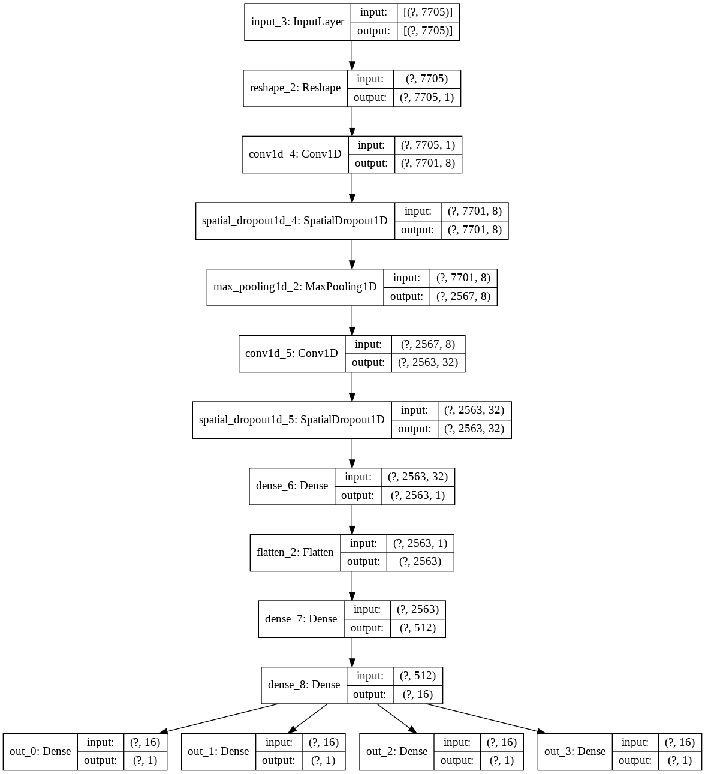

訓練データ：1, 2 検証データ：0 予測データ3
Train on 2362 samples, validate on 1181 samples
Epoch 1/5
2362/2362 [==============================] - 3s 1ms/sample - loss: 0.2684 - out_0_loss: 0.0629 - out_1_loss: 0.0839 - out_2_loss: 0.0467 - out_3_loss: 0.0745 - out_0_acc: 0.9128 - out_1_acc: 0.8874 - out_2_acc: 0.9513 - out_3_acc: 0.9255 - val_loss: 0.2064 - val_out_0_loss: 0.0343 - val_out_1_loss: 0.0569 - val_out_2_loss: 0.0477 - val_out_3_loss: 0.0674 - val_out_0_acc: 0.9543 - val_out_1_acc: 0.9331 - val_out_2_acc: 0.9500 - val_out_3_acc: 0.9323
Epoch 2/5
2362/2362 [==============================] - 1s 542us/sample - loss: 0.1793 - out_0_loss: 0.0309 - out_1_loss: 0.0442 - out_2_loss: 0.0331 - out_3_loss: 0.0710 - out_0_acc: 0.9653 - out_1_acc: 0.9500 - out_2_acc: 0.9640 - out_3_acc: 0.9285 - val_loss: 0.1574 - val_out_0_loss: 0.0260 - val_out_1_loss: 0.0427 - val_out_2_loss: 0.0213 - val_out_3_loss: 0.0674 - val_out_0_acc: 0.9687 - val_out_1_acc: 0.9483 - val_out_2_acc: 0.9763 - val_out_3_acc: 0.932

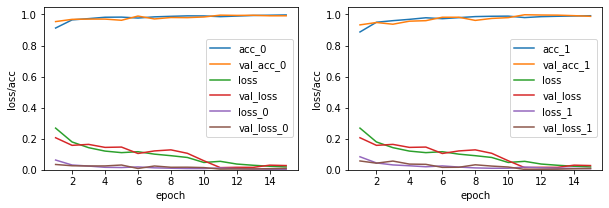

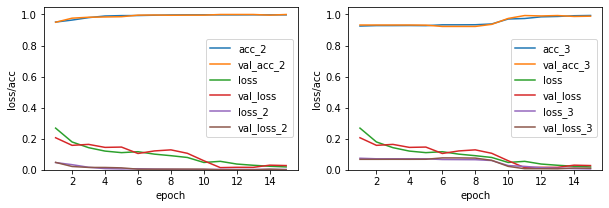

x_count_MeCab.npy 2dim_2ch mean_squared_error RMSprop
1183/1183 [==============================] - 0s 272us/sample
正答率 95.1% 

訓練データ：2, 3 検証データ：1 予測データ0
Train on 2364 samples, validate on 1181 samples
Epoch 1/5
2364/2364 [==============================] - 3s 1ms/sample - loss: 0.2651 - out_0_loss: 0.0661 - out_1_loss: 0.0760 - out_2_loss: 0.0536 - out_3_loss: 0.0692 - out_0_acc: 0.9150 - out_1_acc: 0.9048 - out_2_acc: 0.9442 - out_3_acc: 0.9327 - val_loss: 0.2038 - val_out_0_loss: 0.0371 - val_out_1_loss: 0.0480 - val_out_2_loss: 0.0422 - val_out_3_loss: 0.0766 - val_out_0_acc: 0.9526 - val_out_1_acc: 0.9424 - val_out_2_acc: 0.9577 - val_out_3_acc: 0.9229
Epoch 2/5
2364/2364 [==============================] - 1s 530us/sample - loss: 0.1841 - out_0_loss: 0.0299 - out_1_loss: 0.0444 - out_2_loss: 0.0453 - out_3_loss: 0.0648 - out_0_acc: 0.9640 - out_1_acc: 0.9467 - out_2_acc: 0.9547 - out_3_acc: 0.9349 - val_loss: 0.2325 - val_out_0_loss: 0.0641 - val_out_1_loss: 0.0510 - val_out_2_loss:

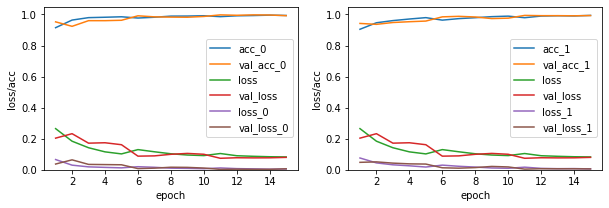

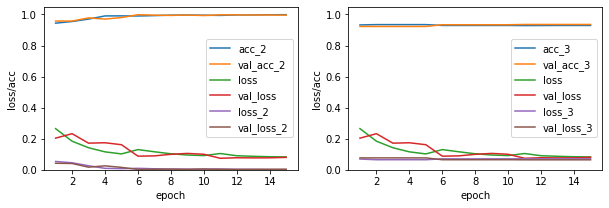

x_count_MeCab.npy 2dim_2ch mean_squared_error RMSprop
1181/1181 [==============================] - 0s 212us/sample
正答率 90.3% 

訓練データ：2, 3 検証データ：0 予測データ1
Train on 2364 samples, validate on 1181 samples
Epoch 1/5
2364/2364 [==============================] - 3s 1ms/sample - loss: 0.3045 - out_0_loss: 0.0779 - out_1_loss: 0.0945 - out_2_loss: 0.0529 - out_3_loss: 0.0793 - out_0_acc: 0.8989 - out_1_acc: 0.8735 - out_2_acc: 0.9484 - out_3_acc: 0.9285 - val_loss: 0.2319 - val_out_0_loss: 0.0546 - val_out_1_loss: 0.0604 - val_out_2_loss: 0.0499 - val_out_3_loss: 0.0669 - val_out_0_acc: 0.9297 - val_out_1_acc: 0.9297 - val_out_2_acc: 0.9500 - val_out_3_acc: 0.9323
Epoch 2/5
2364/2364 [==============================] - 1s 479us/sample - loss: 0.1870 - out_0_loss: 0.0305 - out_1_loss: 0.0462 - out_2_loss: 0.0453 - out_3_loss: 0.0649 - out_0_acc: 0.9649 - out_1_acc: 0.9450 - out_2_acc: 0.9547 - out_3_acc: 0.9349 - val_loss: 0.1972 - val_out_0_loss: 0.0288 - val_out_1_loss: 0.0516 - val_out_2_loss:

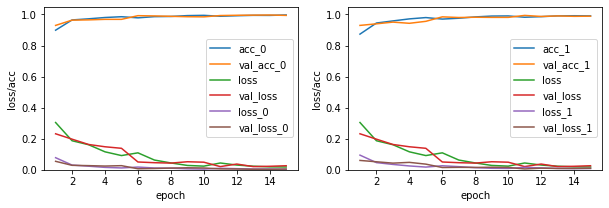

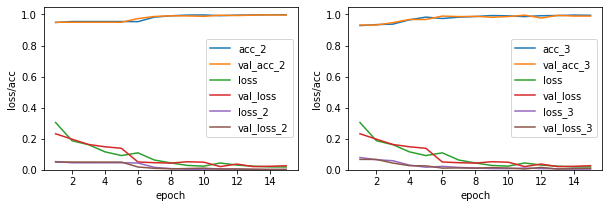

x_count_MeCab.npy 2dim_2ch mean_squared_error RMSprop
1181/1181 [==============================] - 0s 222us/sample
正答率 94.3% 

訓練データ：1, 3 検証データ：0 予測データ2
Train on 2364 samples, validate on 1181 samples
Epoch 1/5
2364/2364 [==============================] - 3s 1ms/sample - loss: 0.2697 - out_0_loss: 0.0683 - out_1_loss: 0.0806 - out_2_loss: 0.0471 - out_3_loss: 0.0737 - out_0_acc: 0.8955 - out_1_acc: 0.8997 - out_2_acc: 0.9552 - out_3_acc: 0.9264 - val_loss: 0.2153 - val_out_0_loss: 0.0396 - val_out_1_loss: 0.0606 - val_out_2_loss: 0.0486 - val_out_3_loss: 0.0664 - val_out_0_acc: 0.9475 - val_out_1_acc: 0.9356 - val_out_2_acc: 0.9500 - val_out_3_acc: 0.9323
Epoch 2/5
2364/2364 [==============================] - 1s 511us/sample - loss: 0.1628 - out_0_loss: 0.0297 - out_1_loss: 0.0412 - out_2_loss: 0.0442 - out_3_loss: 0.0478 - out_0_acc: 0.9649 - out_1_acc: 0.9505 - out_2_acc: 0.9556 - out_3_acc: 0.9480 - val_loss: 0.1803 - val_out_0_loss: 0.0282 - val_out_1_loss: 0.0578 - val_out_2_loss:

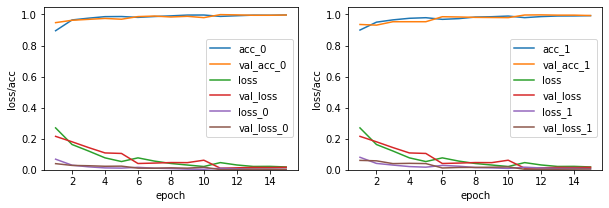

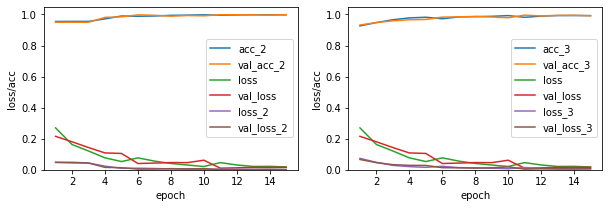

x_count_MeCab.npy 2dim_2ch mean_squared_error RMSprop
1181/1181 [==============================] - 0s 232us/sample
正答率 93.7% 

[['1dim×4' 'sigmoid' 'mean_squared_error' 'RMSprop' 'x_count_MeCab'
  '95.1%']
 ['1dim×4' 'sigmoid' 'mean_squared_error' 'RMSprop' 'x_count_MeCab'
  '90.3%']
 ['1dim×4' 'sigmoid' 'mean_squared_error' 'RMSprop' 'x_count_MeCab'
  '94.3%']
 ['1dim×4' 'sigmoid' 'mean_squared_error' 'RMSprop' 'x_count_MeCab'
  '93.7%']]
平均：93.35% 最低値：90.3% 最高値：95.1%


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 7705)]       0                                            
__________________________________________________________________________________________________
reshape (Reshape)               (None, 7705, 1)      0           input_1[0][0]                    
______________

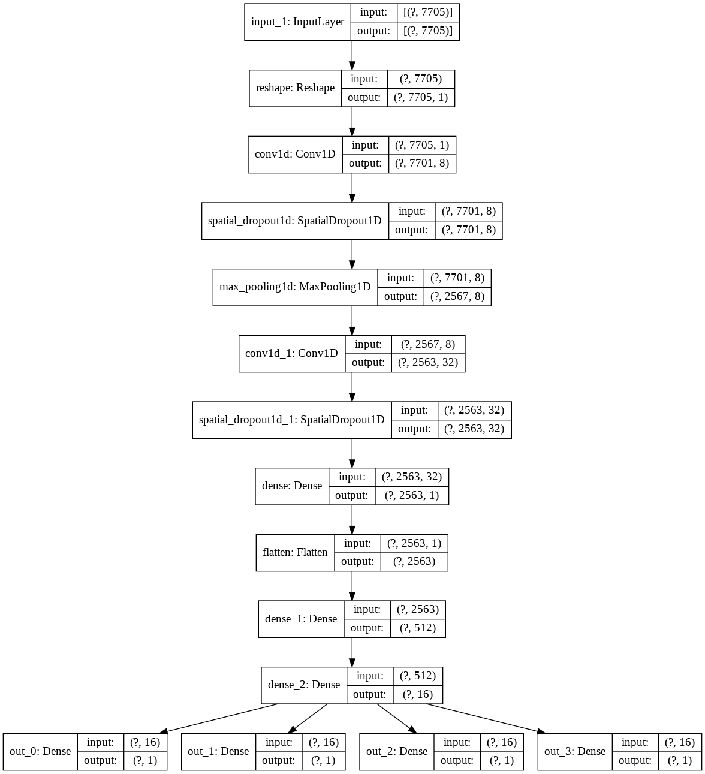

訓練データ：1, 2 検証データ：0 予測データ3
Train on 2362 samples, validate on 1181 samples
Epoch 1/5
2362/2362 [==============================] - 4s 2ms/sample - loss: 1.5406 - out_0_loss: 0.4221 - out_1_loss: 0.7264 - out_2_loss: 0.1590 - out_3_loss: 0.2325 - out_0_acc: 0.9018 - out_1_acc: 0.8734 - out_2_acc: 0.9560 - out_3_acc: 0.9306 - val_loss: 1.2999 - val_out_0_loss: 0.3435 - val_out_1_loss: 0.6836 - val_out_2_loss: 0.1137 - val_out_3_loss: 0.1592 - val_out_0_acc: 0.9517 - val_out_1_acc: 0.9340 - val_out_2_acc: 0.9619 - val_out_3_acc: 0.9492
Epoch 2/5
2362/2362 [==============================] - 1s 577us/sample - loss: 1.2441 - out_0_loss: 0.3590 - out_1_loss: 0.6499 - out_2_loss: 0.0742 - out_3_loss: 0.1608 - out_0_acc: 0.9644 - out_1_acc: 0.9412 - out_2_acc: 0.9822 - out_3_acc: 0.9513 - val_loss: 1.2615 - val_out_0_loss: 0.3359 - val_out_1_loss: 0.6746 - val_out_2_loss: 0.1120 - val_out_3_loss: 0.1393 - val_out_0_acc: 0.9577 - val_out_1_acc: 0.9424 - val_out_2_acc: 0.9805 - val_out_3_acc: 0.966

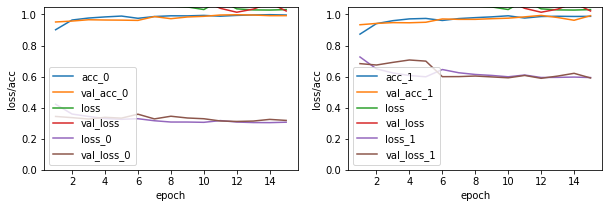

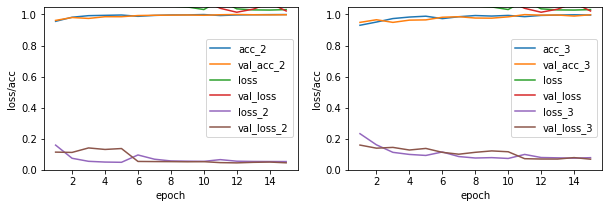

x_count_MeCab.npy 2dim_2ch poisson Nadam
1183/1183 [==============================] - 0s 238us/sample
正答率 94.8% 

訓練データ：2, 3 検証データ：1 予測データ0
Train on 2364 samples, validate on 1181 samples
Epoch 1/5
2364/2364 [==============================] - 3s 1ms/sample - loss: 1.5531 - out_0_loss: 0.4083 - out_1_loss: 0.7276 - out_2_loss: 0.1689 - out_3_loss: 0.2478 - out_0_acc: 0.9196 - out_1_acc: 0.8693 - out_2_acc: 0.9590 - out_3_acc: 0.9188 - val_loss: 1.3223 - val_out_0_loss: 0.3823 - val_out_1_loss: 0.6538 - val_out_2_loss: 0.1100 - val_out_3_loss: 0.1763 - val_out_0_acc: 0.9441 - val_out_1_acc: 0.9306 - val_out_2_acc: 0.9695 - val_out_3_acc: 0.9500
Epoch 2/5
2364/2364 [==============================] - 1s 553us/sample - loss: 1.2374 - out_0_loss: 0.3638 - out_1_loss: 0.6533 - out_2_loss: 0.0872 - out_3_loss: 0.1330 - out_0_acc: 0.9594 - out_1_acc: 0.9442 - out_2_acc: 0.9767 - out_3_acc: 0.9636 - val_loss: 1.2612 - val_out_0_loss: 0.3749 - val_out_1_loss: 0.6315 - val_out_2_loss: 0.0955 - val

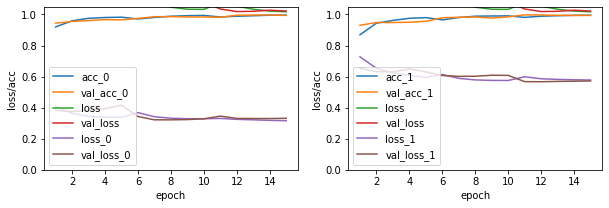

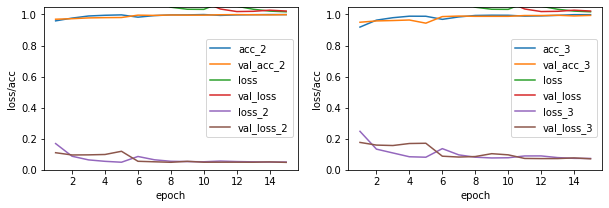

x_count_MeCab.npy 2dim_2ch poisson Nadam
1181/1181 [==============================] - 0s 212us/sample
正答率 95.2% 

訓練データ：2, 3 検証データ：0 予測データ1
Train on 2364 samples, validate on 1181 samples
Epoch 1/5
2364/2364 [==============================] - 3s 1ms/sample - loss: 1.5394 - out_0_loss: 0.4120 - out_1_loss: 0.7127 - out_2_loss: 0.1705 - out_3_loss: 0.2440 - out_0_acc: 0.9124 - out_1_acc: 0.8579 - out_2_acc: 0.9497 - out_3_acc: 0.9323 - val_loss: 1.3437 - val_out_0_loss: 0.3470 - val_out_1_loss: 0.6875 - val_out_2_loss: 0.1194 - val_out_3_loss: 0.1896 - val_out_0_acc: 0.9492 - val_out_1_acc: 0.9289 - val_out_2_acc: 0.9594 - val_out_3_acc: 0.9416
Epoch 2/5
2364/2364 [==============================] - 1s 556us/sample - loss: 1.2562 - out_0_loss: 0.3586 - out_1_loss: 0.6490 - out_2_loss: 0.0953 - out_3_loss: 0.1532 - out_0_acc: 0.9674 - out_1_acc: 0.9425 - out_2_acc: 0.9772 - out_3_acc: 0.9577 - val_loss: 1.2757 - val_out_0_loss: 0.3421 - val_out_1_loss: 0.6813 - val_out_2_loss: 0.1081 - val

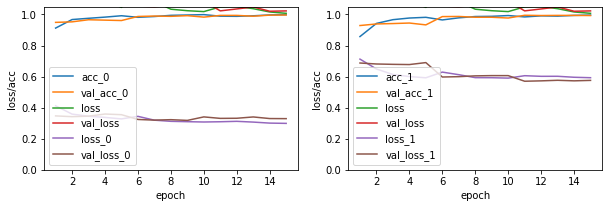

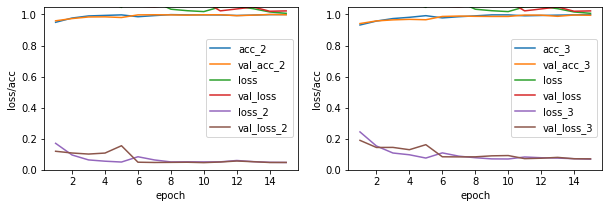

x_count_MeCab.npy 2dim_2ch poisson Nadam
1181/1181 [==============================] - 0s 213us/sample
正答率 93.5% 

訓練データ：1, 3 検証データ：0 予測データ2
Train on 2364 samples, validate on 1181 samples
Epoch 1/5
2364/2364 [==============================] - 4s 2ms/sample - loss: 1.5078 - out_0_loss: 0.4193 - out_1_loss: 0.6853 - out_2_loss: 0.1701 - out_3_loss: 0.2326 - out_0_acc: 0.9112 - out_1_acc: 0.9061 - out_2_acc: 0.9535 - out_3_acc: 0.9294 - val_loss: 1.3529 - val_out_0_loss: 0.3474 - val_out_1_loss: 0.6793 - val_out_2_loss: 0.1215 - val_out_3_loss: 0.2048 - val_out_0_acc: 0.9467 - val_out_1_acc: 0.9297 - val_out_2_acc: 0.9610 - val_out_3_acc: 0.9433
Epoch 2/5
2364/2364 [==============================] - 1s 552us/sample - loss: 1.2200 - out_0_loss: 0.3710 - out_1_loss: 0.6228 - out_2_loss: 0.0898 - out_3_loss: 0.1361 - out_0_acc: 0.9585 - out_1_acc: 0.9497 - out_2_acc: 0.9759 - out_3_acc: 0.9649 - val_loss: 1.2882 - val_out_0_loss: 0.3405 - val_out_1_loss: 0.6741 - val_out_2_loss: 0.0939 - val

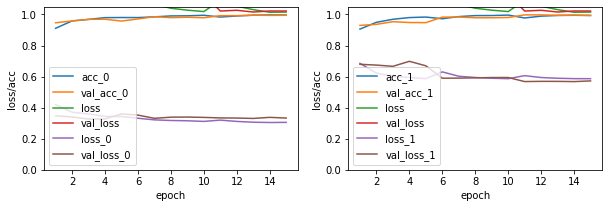

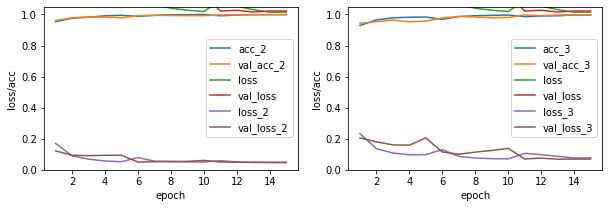

x_count_MeCab.npy 2dim_2ch poisson Nadam
1181/1181 [==============================] - 0s 257us/sample
正答率 93.1% 

[['1dim×4' 'sigmoid' 'poisson' 'Nadam' 'x_count_MeCab' '94.8%']
 ['1dim×4' 'sigmoid' 'poisson' 'Nadam' 'x_count_MeCab' '95.2%']
 ['1dim×4' 'sigmoid' 'poisson' 'Nadam' 'x_count_MeCab' '93.5%']
 ['1dim×4' 'sigmoid' 'poisson' 'Nadam' 'x_count_MeCab' '93.1%']]
平均：94.15% 最低値：93.1% 最高値：95.2%

[['1dim×4' 'sigmoid' 'mean_squared_error' 'RMSprop' 'x_count_MeCab'
  '95.1%']
 ['1dim×4' 'sigmoid' 'mean_squared_error' 'RMSprop' 'x_count_MeCab'
  '90.3%']
 ['1dim×4' 'sigmoid' 'mean_squared_error' 'RMSprop' 'x_count_MeCab'
  '94.3%']
 ['1dim×4' 'sigmoid' 'mean_squared_error' 'RMSprop' 'x_count_MeCab'
  '93.7%']
 ['1dim×4' 'sigmoid' 'poisson' 'Nadam' 'x_count_MeCab' '94.8%']
 ['1dim×4' 'sigmoid' 'poisson' 'Nadam' 'x_count_MeCab' '95.2%']
 ['1dim×4' 'sigmoid' 'poisson' 'Nadam' 'x_count_MeCab' '93.5%']
 ['1dim×4' 'sigmoid' 'poisson' 'Nadam' 'x_count_MeCab' '93.1%']]


In [0]:
# 出力1次元×4 sigmoid

%tensorflow_version 2.x
import tensorflow as tf
print('tf.version', tf.__version__)
from tensorflow.keras import losses
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Embedding, Reshape, Conv1D, Activation
from tensorflow.keras.layers import SpatialDropout1D, MaxPooling1D, Dense, Flatten
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from PIL import Image
from IPython.core.display import display
import numpy as np
import csv

class NN:


  def Return_model(model, input_dim, No_):
    # 生成したネットワーク図の表示
    if No_ == 0:
      print()
      model.summary()
      plot_model(model, 
                to_file='data/network/NN_DrctIn_'+str(input_dim)+'d_2LConv1D_2dOutsft.png', 
                show_shapes=True)
      im = Image.open('data/network/NN_DrctIn_'+str(input_dim)+'d_2LConv1D_2dOutsft.png')
      im_resize = im.resize(size=(int(im.width*coef), int(im.height*coef)))
      display(im_resize)

    return model


  def DrctIn_2LConv1D_1d4Out_sigmoid(input_dim, No_):
    inputs = Input(shape=input_dim)
    h = Reshape((input_dim, 1), input_shape=(input_dim,))(inputs)
    h = Conv1D(8, 5, activation='relu')(h)
    h = SpatialDropout1D(0.2)(h)
    h = MaxPooling1D(3)(h)
    h = Conv1D(32, 5, activation='relu')(h)
    h = SpatialDropout1D(0.2)(h)
    h = Dense(1, activation='relu')(h)
    h = Flatten()(h)
    h = Dense(512, activation='relu')(h)
    h = Dense(16, activation='relu')(h)
    out_0 = Dense(1, activation='sigmoid', name='out_0')(h)
    out_1 = Dense(1, activation='sigmoid', name='out_1')(h)
    out_2 = Dense(1, activation='sigmoid', name='out_2')(h)
    out_3 = Dense(1, activation='sigmoid', name='out_3')(h)

    model = Model(inputs=inputs, outputs=[out_0, out_1, out_2, out_3])
    return model


  def EmbedIn_2LConv1D_1d4Out_sigmoid(input_dim, IDmax, No_):
    if input_dim >= 300:
      inputs = Input(shape=input_dim)
      h = Embedding(IDmax+1, 16)(inputs)
      h = Conv1D(8, 5, activation='relu')(h)
      h = SpatialDropout1D(0.2)(h)
      h = MaxPooling1D(3)(h)
      h = Conv1D(32, 5, activation='relu')(h)
      h = SpatialDropout1D(0.2)(h)
      #h = Dense(1, activation='relu')(h)
      h = Flatten()(h)
      h = Dense(512, activation='relu')(h)
      h = Dense(16, activation='relu')(h)
      out_0 = Dense(1, activation='sigmoid', name='out_0')(h)
      out_1 = Dense(1, activation='sigmoid', name='out_1')(h)
      out_2 = Dense(1, activation='sigmoid', name='out_2')(h)
      out_3 = Dense(1, activation='sigmoid', name='out_3')(h)
    else:
      inputs = Input(shape=input_dim)
      h = Embedding(IDmax+1, 16)(inputs)
      h = Conv1D(8, 5, activation='relu')(h)
      h = SpatialDropout1D(0.2)(h)
      #h = MaxPooling1D(3)(h)
      h = Conv1D(32, 5, activation='relu')(h)
      h = SpatialDropout1D(0.2)(h)
      #h = Dense(1, activation='relu')(h)
      h = Flatten()(h)
      h = Dense(512, activation='relu')(h)
      h = Dense(16, activation='relu')(h)
      out_0 = Dense(1, activation='sigmoid', name='out_0')(h)
      out_1 = Dense(1, activation='sigmoid', name='out_1')(h)
      out_2 = Dense(1, activation='sigmoid', name='out_2')(h)
      out_3 = Dense(1, activation='sigmoid', name='out_3')(h)

    model = Model(inputs=inputs, outputs=[out_0, out_1, out_2, out_3])
    return model


files = ['x_count_MeCab.npy', 'x_count_sentencepiece.npy', 'x_count_TExMeCab.npy', 
         'x_count_TermExtract.npy', 'x_count_ginza.npy', 'x_count_entginza.npy', 
         #'x_tfidf_MeCab.npy', 'x_tfidf_sentencepiece.npy', 'x_tfidf_TExMeCab.npy', 
         #'x_tfidf_TermExtract.npy', 'x_tfidf_ginza.npy', 'x_tfidf_entginza.npy'#, 
         #'x_number_MeCab.npy', 'x_number_sentencepiece.npy', 'x_number_TExMeCab.npy', 
         #'x_number_TermExtract.npy', 'x_number_ginza.npy', 'x_number_entginza.npy', 
         #'x_doc2vec_dm0_MeCab.npy', 'x_doc2vec_dm0_sentencepiece.npy', 
         #'x_doc2vec_dm0_MeCab+TermExtract.npy', 'x_doc2vec_dm0_TermExtract.npy', 
         #'x_doc2vec_dm1_MeCab.npy', 'x_doc2vec_dm1_sentencepiece.npy', 
         #'x_doc2vec_dm1_MeCab+TermExtract.npy',  'x_doc2vec_dm1_TermExtract.npy', 
         #'ginza_vec.npy'
         ]

acquisition = [[[1, 2, 0, 3], [0, 2, 1, 3], [0, 1, 2, 3]], 
               [[2, 3, 1, 0], [1, 3, 2, 0], [1, 2, 3, 0]], 
               [[2, 3, 0, 1], [0, 3, 2, 1], [0, 2, 3, 1]], 
               [[1, 3, 0, 2], [0, 3, 1, 2], [0, 1, 3, 2]]
               ]

batch_size = 32
epochs = 5
coef = .6 #ネットワーク図の拡大率

conditions = [['mean_squared_error', 'RMSprop'], ['mean_squared_error', 'Adam'], 
              ['mean_squared_logarithmic_error', 'RMSprop'], ['logcosh', 'Nadam'], 
              ['binary_crossentropy', 'Adamax'], ['binary_crossentropy', 'Nadam'], 
              ['poisson', 'Nadam']]

metrics = ['acc']

y_ = category
result = []

for file in files:
  print(file.replace('.npy', '')+'の4値分類を開始')
  x_ = np.load('data/'+file)
  index = np.random.permutation(np.arange(len(x_)))
  
  # 学習
  print()
  div = len(x_)//4
  x_immd0, y_immd0 = x_[index[:div]], y_[index[:div]]
  x_immd1, y_immd1 = x_[index[div:div*2]], y_[index[div:div*2]]
  x_immd2, y_immd2 = x_[index[div*2:div*3]], y_[index[div*2:div*3]]
  x_immd3, y_immd3 = x_[index[div*3:]], y_[index[div*3:]]
  training = {'acc': [], 'loss': [], 'val_acc': [], 'val_loss': []}

  for loss, optimizer in conditions:
    i = 0
    for pred_blocks in acquisition:
      if ('x_number' in file) == False:
        model = NN.DrctIn_2LConv1D_1d4Out_sigmoid(x_.shape[1], i)
      else:
        IDmax = np.max(x_)
        model = NN.EmbedIn_2LConv1D_1d4Out_sigmoid(x_.shape[1], IDmax, i)
      model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
      NN.Return_model(model, x_.shape[1], i)
      j = 0
      BLK_0, BLK_1, BLK_2, BLK_3 = '', '', '', ''
      for swap_data in pred_blocks:
        initial_epoch = epochs*j
        if (swap_data[0] == 0)&(swap_data[1] == 1):
          x_train = np.vstack((x_immd0, x_immd1))
          y_train = np.vstack((y_immd0, y_immd1))
          BLK_0, BLK_1 = '0', '1'
        elif (swap_data[0] == 0)&(swap_data[1] == 2):
          x_train = np.vstack((x_immd0, x_immd2))
          y_train = np.vstack((y_immd0, y_immd2))
          BLK_0, BLK_1 = '0', '2'
        elif (swap_data[0] == 0)&(swap_data[1] == 3):
          x_train = np.vstack((x_immd0, x_immd3))
          y_train = np.vstack((y_immd0, y_immd3))
          BLK_0, BLK_1 = '0', '3'
        elif (swap_data[0] == 1)&(swap_data[1] == 2):
          x_train = np.vstack((x_immd1, x_immd2))
          y_train = np.vstack((y_immd1, y_immd2))
          BLK_0, BLK_1 = '1', '2'
        elif (swap_data[0] == 1)&(swap_data[1] == 3):
          x_train = np.vstack((x_immd1, x_immd3))
          y_train = np.vstack((y_immd1, y_immd3))
          BLK_0, BLK_1 = '1', '3'
        elif (swap_data[0] == 2)&(swap_data[1] == 3):
          x_train = np.vstack((x_immd2, x_immd3))
          y_train = np.vstack((y_immd2, y_immd3))
          BLK_0, BLK_1 = '2', '3'
        if swap_data[2] == 0:
          x_valid, y_valid = x_immd0, y_immd0
          BLK_2 = '0'
        elif swap_data[2] == 1:
          x_valid, y_valid = x_immd1, y_immd1
          BLK_2 = '1'
        elif swap_data[2] == 2:
          x_valid, y_valid = x_immd2, y_immd2
          BLK_2 = '2'
        elif swap_data[2] == 3:
          x_valid, y_valid = x_immd3, y_immd3
          BLK_2 = '3'
        if swap_data[3] == 0:
          x_pred, y_pred = x_immd0, y_immd0
          BLK_3 = '0'
        elif swap_data[3] == 1:
          x_pred, y_pred = x_immd1, y_immd1
          BLK_3 = '1'
        elif swap_data[3] == 2:
          x_pred, y_pred = x_immd2, y_immd2
          BLK_3 = '2'
        elif swap_data[3] == 3:
          x_pred, y_pred = x_immd3, y_immd3
          BLK_3 = '3'
        try:
          print('訓練データ：'+BLK_0+', '+BLK_1, '検証データ：'+BLK_2, '予測データ'+BLK_3)
          temp = model.fit(x_train, {'out_0':y_train[:,0], 'out_1':y_train[:,1],
                                     'out_2':y_train[:,2], 'out_3':y_train[:,3]}, 
                           batch_size=batch_size, initial_epoch=initial_epoch, epochs=initial_epoch+epochs,
                            verbose=1, validation_data=(x_valid, {
                                'out_0':y_valid[:,0], 'out_1':y_valid[:,1],
                                'out_2':y_valid[:,2], 'out_3':y_valid[:,3]}))
          if j == 0: 
            training = temp
          else:
            #training.history['acc'] += temp.history['acc']
            training.history['loss'] += temp.history['loss']
            #training.history['val_acc'] += temp.history['val_acc']
            training.history['val_loss'] += temp.history['val_loss']
            training.history['out_0_acc'] += temp.history['out_0_acc']
            training.history['out_0_loss'] += temp.history['out_0_loss']
            training.history['out_1_acc'] += temp.history['out_1_acc']
            training.history['out_1_loss'] += temp.history['out_1_loss']
            training.history['out_2_acc'] += temp.history['out_2_acc']
            training.history['out_2_loss'] += temp.history['out_2_loss']
            training.history['out_3_acc'] += temp.history['out_3_acc']
            training.history['out_3_loss'] += temp.history['out_3_loss']
            training.history['val_out_0_acc'] += temp.history['val_out_0_acc']
            training.history['val_out_0_loss'] += temp.history['val_out_0_loss']
            training.history['val_out_1_acc'] += temp.history['val_out_1_acc']
            training.history['val_out_1_loss'] += temp.history['val_out_1_loss']
            training.history['val_out_2_acc'] += temp.history['val_out_2_acc']
            training.history['val_out_2_loss'] += temp.history['val_out_2_loss']
            training.history['val_out_3_acc'] += temp.history['val_out_3_acc']
            training.history['val_out_3_loss'] += temp.history['val_out_3_loss']
          j += 1
        except:
          print('error at loss = '+loss+', optimizer = '+optimizer)
          continue
        i += 1
      # 学習曲線のプロット
      plot_quad_history(training, file, '2dim_2ch', loss, optimizer)

      # 未知データを入力して正答率を求める
      pred_data = model.predict(x_pred, batch_size=batch_size, verbose=1, steps=None)
      pred_data = to_categorical(np.argmax(np.hstack((pred_data[0], pred_data[1],
                                                      pred_data[2], pred_data[3])), 
                                           axis=1), num_classes=4)
      accuracy = (sum(y_pred[:, 0]*pred_data[:, 0])+sum(y_pred[:, 1]*pred_data[:, 1])+
                  sum(y_pred[:, 2]*pred_data[:, 2])+sum(y_pred[:, 3]*pred_data[:, 3]))/len(y_pred)
      print('正答率', '{:.1%}'.format(accuracy), '\n')
      result.append(['1dim×4', 'sigmoid', loss, optimizer, file.replace('.npy', ''), '{:.1%}'.format(accuracy)])

      # Tensorflow graphの消去
      tf.keras.backend.clear_session()
    print(np.array(result)[-4:])
    # スコアの記録
    score = np.array(result)[-4:, -1]
    calc = [float(score[0][:-1])]
    calc.append(float(score[1][:-1]))
    calc.append(float(score[2][:-1]))
    calc.append(float(score[3][:-1]))
    calc = np.array(calc)
    print('平均：'+str(np.mean(calc))+'%', 
          '最低値：'+str(np.min(calc))+'%', '最高値：'+str(np.max(calc))+'%\n')
print(np.array(result))
with open('data/NN条件調査.csv', 'a') as f:
  writer = csv.writer(f, lineterminator='\n')
  writer.writerows(result)

In [0]:
# 出力1次元×4 sigmoid

%tensorflow_version 2.x
import tensorflow as tf
print('tf.version', tf.__version__)
from tensorflow.keras import losses
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Embedding, Reshape, Conv1D, Activation
from tensorflow.keras.layers import SpatialDropout1D, MaxPooling1D, Dense, Flatten
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from PIL import Image
from IPython.core.display import display
import numpy as np
import csv

class NN:


  def Return_model(model, input_dim, No_):
    # 生成したネットワーク図の表示
    if No_ == 0:
      print()
      model.summary()
      plot_model(model, 
                to_file='data/network/NN_DrctIn_'+str(input_dim)+'d_2LConv1D_2dOutsft.png', 
                show_shapes=True)
      im = Image.open('data/network/NN_DrctIn_'+str(input_dim)+'d_2LConv1D_2dOutsft.png')
      im_resize = im.resize(size=(int(im.width*coef), int(im.height*coef)))
      display(im_resize)

    return model


  def DrctIn_2LConv1D_1d4Out_sigmoid(input_dim, No_):
    inputs = Input(shape=input_dim)
    h = Reshape((input_dim, 1), input_shape=(input_dim,))(inputs)
    h = Conv1D(8, 5, activation='relu')(h)
    h = SpatialDropout1D(0.2)(h)
    h = MaxPooling1D(3)(h)
    h = Conv1D(32, 5, activation='relu')(h)
    h = SpatialDropout1D(0.2)(h)
    h = Dense(1, activation='relu')(h)
    h = Flatten()(h)
    h = Dense(512, activation='relu')(h)
    h = Dense(16, activation='relu')(h)
    out_0 = Dense(1, activation='sigmoid', name='out_0')(h)
    out_1 = Dense(1, activation='sigmoid', name='out_1')(h)
    out_2 = Dense(1, activation='sigmoid', name='out_2')(h)
    out_3 = Dense(1, activation='sigmoid', name='out_3')(h)

    model = Model(inputs=inputs, outputs=[out_0, out_1, out_2, out_3])
    return model


  def EmbedIn_2LConv1D_1d4Out_sigmoid(input_dim, IDmax, No_):
    if input_dim >= 300:
      inputs = Input(shape=input_dim)
      h = Embedding(IDmax+1, 16)(inputs)
      h = Conv1D(8, 5, activation='relu')(h)
      h = SpatialDropout1D(0.2)(h)
      h = MaxPooling1D(3)(h)
      h = Conv1D(32, 5, activation='relu')(h)
      h = SpatialDropout1D(0.2)(h)
      #h = Dense(1, activation='relu')(h)
      h = Flatten()(h)
      h = Dense(512, activation='relu')(h)
      h = Dense(16, activation='relu')(h)
      out_0 = Dense(1, activation='sigmoid', name='out_0')(h)
      out_1 = Dense(1, activation='sigmoid', name='out_1')(h)
      out_2 = Dense(1, activation='sigmoid', name='out_2')(h)
      out_3 = Dense(1, activation='sigmoid', name='out_3')(h)
    else:
      inputs = Input(shape=input_dim)
      h = Embedding(IDmax+1, 16)(inputs)
      h = Conv1D(8, 5, activation='relu')(h)
      h = SpatialDropout1D(0.2)(h)
      #h = MaxPooling1D(3)(h)
      h = Conv1D(32, 5, activation='relu')(h)
      h = SpatialDropout1D(0.2)(h)
      #h = Dense(1, activation='relu')(h)
      h = Flatten()(h)
      h = Dense(512, activation='relu')(h)
      h = Dense(16, activation='relu')(h)
      out_0 = Dense(1, activation='sigmoid', name='out_0')(h)
      out_1 = Dense(1, activation='sigmoid', name='out_1')(h)
      out_2 = Dense(1, activation='sigmoid', name='out_2')(h)
      out_3 = Dense(1, activation='sigmoid', name='out_3')(h)

    model = Model(inputs=inputs, outputs=[out_0, out_1, out_2, out_3])
    return model


files = ['x_count_MeCab.npy', 'x_count_sentencepiece.npy', 'x_count_TExMeCab.npy', 
         'x_count_TermExtract.npy', 'x_count_ginza.npy', 'x_count_entginza.npy', 
         #'x_tfidf_MeCab.npy', 'x_tfidf_sentencepiece.npy', 'x_tfidf_TExMeCab.npy', 
         #'x_tfidf_TermExtract.npy', 'x_tfidf_ginza.npy', 'x_tfidf_entginza.npy'#, 
         #'x_number_MeCab.npy', 'x_number_sentencepiece.npy', 'x_number_TExMeCab.npy', 
         #'x_number_TermExtract.npy', 'x_number_ginza.npy', 'x_number_entginza.npy', 
         #'x_doc2vec_dm0_MeCab.npy', 'x_doc2vec_dm0_sentencepiece.npy', 
         #'x_doc2vec_dm0_MeCab+TermExtract.npy', 'x_doc2vec_dm0_TermExtract.npy', 
         #'x_doc2vec_dm1_MeCab.npy', 'x_doc2vec_dm1_sentencepiece.npy', 
         #'x_doc2vec_dm1_MeCab+TermExtract.npy',  'x_doc2vec_dm1_TermExtract.npy', 
         #'ginza_vec.npy'
         ]

acquisition = [[[1, 2, 0, 3], [0, 2, 1, 3], [0, 1, 2, 3]], 
               [[2, 3, 1, 0], [1, 3, 2, 0], [1, 2, 3, 0]], 
               [[2, 3, 0, 1], [0, 3, 2, 1], [0, 2, 3, 1]], 
               [[1, 3, 0, 2], [0, 3, 1, 2], [0, 1, 3, 2]]
               ]

batch_size = 32
epochs = 5
coef = .6 #ネットワーク図の拡大率

conditions = [['mean_squared_error', 'RMSprop'], ['mean_squared_error', 'Adam'], 
              ['mean_squared_logarithmic_error', 'RMSprop'], ['logcosh', 'Nadam'], 
              ['binary_crossentropy', 'Adamax'], ['binary_crossentropy', 'Nadam'], 
              ['categorical_crossentropy', 'Adamax'], ['categorical_crossentropy', 'Nadam'], 
              ['poisson', 'Nadam']]

metrics = ['acc']

y_ = category
result = []

for file in files:
  print(file.replace('.npy', '')+'の4値分類を開始')
  x_ = np.load('data/'+file)
  index = np.random.permutation(np.arange(len(x_)))
  
  # 学習
  print()
  div = len(x_)//4
  x_immd0, y_immd0 = x_[index[:div]], y_[index[:div]]
  x_immd1, y_immd1 = x_[index[div:div*2]], y_[index[div:div*2]]
  x_immd2, y_immd2 = x_[index[div*2:div*3]], y_[index[div*2:div*3]]
  x_immd3, y_immd3 = x_[index[div*3:]], y_[index[div*3:]]
  training = {'acc': [], 'loss': [], 'val_acc': [], 'val_loss': []}

  for loss, optimizer in conditions:
    i = 0
    for pred_blocks in acquisition:
      if ('x_number' in file) == False:
        model = NN.DrctIn_2LConv1D_1d4Out_sigmoid(x_.shape[1], i)
      else:
        IDmax = np.max(x_)
        model = NN.EmbedIn_2LConv1D_1d4Out_sigmoid(x_.shape[1], IDmax, i)
      model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
      NN.Return_model(model, x_.shape[1], i)
      j = 0
      BLK_0, BLK_1, BLK_2, BLK_3 = '', '', '', ''
      for swap_data in pred_blocks:
        initial_epoch = epochs*j
        if (swap_data[0] == 0)&(swap_data[1] == 1):
          x_train = np.vstack((x_immd0, x_immd1))
          y_train = np.vstack((y_immd0, y_immd1))
          BLK_0, BLK_1 = '0', '1'
        elif (swap_data[0] == 0)&(swap_data[1] == 2):
          x_train = np.vstack((x_immd0, x_immd2))
          y_train = np.vstack((y_immd0, y_immd2))
          BLK_0, BLK_1 = '0', '2'
        elif (swap_data[0] == 0)&(swap_data[1] == 3):
          x_train = np.vstack((x_immd0, x_immd3))
          y_train = np.vstack((y_immd0, y_immd3))
          BLK_0, BLK_1 = '0', '3'
        elif (swap_data[0] == 1)&(swap_data[1] == 2):
          x_train = np.vstack((x_immd1, x_immd2))
          y_train = np.vstack((y_immd1, y_immd2))
          BLK_0, BLK_1 = '1', '2'
        elif (swap_data[0] == 1)&(swap_data[1] == 3):
          x_train = np.vstack((x_immd1, x_immd3))
          y_train = np.vstack((y_immd1, y_immd3))
          BLK_0, BLK_1 = '1', '3'
        elif (swap_data[0] == 2)&(swap_data[1] == 3):
          x_train = np.vstack((x_immd2, x_immd3))
          y_train = np.vstack((y_immd2, y_immd3))
          BLK_0, BLK_1 = '2', '3'
        if swap_data[2] == 0:
          x_valid, y_valid = x_immd0, y_immd0
          BLK_2 = '0'
        elif swap_data[2] == 1:
          x_valid, y_valid = x_immd1, y_immd1
          BLK_2 = '1'
        elif swap_data[2] == 2:
          x_valid, y_valid = x_immd2, y_immd2
          BLK_2 = '2'
        elif swap_data[2] == 3:
          x_valid, y_valid = x_immd3, y_immd3
          BLK_2 = '3'
        if swap_data[3] == 0:
          x_pred, y_pred = x_immd0, y_immd0
          BLK_3 = '0'
        elif swap_data[3] == 1:
          x_pred, y_pred = x_immd1, y_immd1
          BLK_3 = '1'
        elif swap_data[3] == 2:
          x_pred, y_pred = x_immd2, y_immd2
          BLK_3 = '2'
        elif swap_data[3] == 3:
          x_pred, y_pred = x_immd3, y_immd3
          BLK_3 = '3'
        try:
          print('訓練データ：'+BLK_0+', '+BLK_1, '検証データ：'+BLK_2, '予測データ'+BLK_3)
          temp = model.fit(x_train, {'out_0':y_train[:,0], 'out_1':y_train[:,1],
                                     'out_2':y_train[:,2], 'out_3':y_train[:,3]}, 
                           batch_size=batch_size, initial_epoch=initial_epoch, epochs=initial_epoch+epochs,
                            verbose=1, validation_data=(x_valid, {
                                'out_0':y_valid[:,0], 'out_1':y_valid[:,1],
                                'out_2':y_valid[:,2], 'out_3':y_valid[:,3]}))
          if j == 0: 
            training = temp
          else:
            #training.history['acc'] += temp.history['acc']
            training.history['loss'] += temp.history['loss']
            #training.history['val_acc'] += temp.history['val_acc']
            training.history['val_loss'] += temp.history['val_loss']
            training.history['out_0_acc'] += temp.history['out_0_acc']
            training.history['out_0_loss'] += temp.history['out_0_loss']
            training.history['out_1_acc'] += temp.history['out_1_acc']
            training.history['out_1_loss'] += temp.history['out_1_loss']
            training.history['out_2_acc'] += temp.history['out_2_acc']
            training.history['out_2_loss'] += temp.history['out_2_loss']
            training.history['out_3_acc'] += temp.history['out_3_acc']
            training.history['out_3_loss'] += temp.history['out_3_loss']
            training.history['val_out_0_acc'] += temp.history['val_out_0_acc']
            training.history['val_out_0_loss'] += temp.history['val_out_0_loss']
            training.history['val_out_1_acc'] += temp.history['val_out_1_acc']
            training.history['val_out_1_loss'] += temp.history['val_out_1_loss']
            training.history['val_out_2_acc'] += temp.history['val_out_2_acc']
            training.history['val_out_2_loss'] += temp.history['val_out_2_loss']
            training.history['val_out_3_acc'] += temp.history['val_out_3_acc']
            training.history['val_out_3_loss'] += temp.history['val_out_3_loss']
          j += 1
        except:
          print('error at loss = '+loss+', optimizer = '+optimizer)
          continue
        i += 1
      # 学習曲線のプロット
      plot_quad_history(training, file, '1dim_4ch', loss, optimizer)

      # 未知データを入力して正答率を求める
      pred_data = model.predict(x_pred, batch_size=batch_size, verbose=1, steps=None)
      pred_data = to_categorical(np.argmax(np.hstack((pred_data[0], pred_data[1],
                                                      pred_data[2], pred_data[3])), 
                                           axis=1), num_classes=4)
      accuracy = (sum(y_pred[:, 0]*pred_data[:, 0])+sum(y_pred[:, 1]*pred_data[:, 1])+
                  sum(y_pred[:, 2]*pred_data[:, 2])+sum(y_pred[:, 3]*pred_data[:, 3]))/len(y_pred)
      print('正答率', '{:.1%}'.format(accuracy), '\n')
      result.append(['1dim×4', 'sigmoid', loss, optimizer, file.replace('.npy', ''), '{:.1%}'.format(accuracy)])

      # Tensorflow graphの消去
      tf.keras.backend.clear_session()
    print(np.array(result)[-4:])
    # スコアの記録
    score = np.array(result)[-4:, -1]
    calc = [float(score[0][:-1])]
    calc.append(float(score[1][:-1]))
    calc.append(float(score[2][:-1]))
    calc.append(float(score[3][:-1]))
    calc = np.array(calc)
    print('平均：'+str(np.mean(calc))+'%', 
          '最低値：'+str(np.min(calc))+'%', '最高値：'+str(np.max(calc))+'%\n')
print(np.array(result))
with open('data/NN条件調査.csv', 'a') as f:
  writer = csv.writer(f, lineterminator='\n')
  writer.writerows(result)

Output hidden; open in https://colab.research.google.com to view.

In [4]:
# 出力1次元×4 sigmoid

%tensorflow_version 2.x
import tensorflow as tf
print('tf.version', tf.__version__)
from tensorflow.keras import losses
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Embedding, Reshape, Conv1D, Activation
from tensorflow.keras.layers import SpatialDropout1D, MaxPooling1D, Dense, Flatten
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from PIL import Image
from IPython.core.display import display
import numpy as np
import csv

class NN:


  def Return_model(model, input_dim, No_):
    # 生成したネットワーク図の表示
    if No_ == 0:
      print()
      model.summary()
      plot_model(model, 
                to_file='data/network/NN_DrctIn_'+str(input_dim)+'d_2LConv1D_2dOutsft.png', 
                show_shapes=True)
      im = Image.open('data/network/NN_DrctIn_'+str(input_dim)+'d_2LConv1D_2dOutsft.png')
      im_resize = im.resize(size=(int(im.width*coef), int(im.height*coef)))
      display(im_resize)

    return model


  def DrctIn_2LConv1D_1d4Out_sigmoid(input_dim, No_):
    inputs = Input(shape=input_dim)
    h = Reshape((input_dim, 1), input_shape=(input_dim,))(inputs)
    h = Conv1D(8, 5, activation='relu')(h)
    h = SpatialDropout1D(0.2)(h)
    h = MaxPooling1D(3)(h)
    h = Conv1D(32, 5, activation='relu')(h)
    h = SpatialDropout1D(0.2)(h)
    h = Dense(1, activation='relu')(h)
    h = Flatten()(h)
    h = Dense(512, activation='relu')(h)
    h0 = Dense(16, activation='relu')(h)
    h1 = Dense(16, activation='relu')(h)
    h2 = Dense(16, activation='relu')(h)
    h3 = Dense(16, activation='relu')(h)
    out_0 = Dense(1, activation='sigmoid', name='out_0')(h0)
    out_1 = Dense(1, activation='sigmoid', name='out_1')(h1)
    out_2 = Dense(1, activation='sigmoid', name='out_2')(h2)
    out_3 = Dense(1, activation='sigmoid', name='out_3')(h3)

    model = Model(inputs=inputs, outputs=[out_0, out_1, out_2, out_3])
    return model


  def EmbedIn_2LConv1D_1d4Out_sigmoid(input_dim, IDmax, No_):
    if input_dim >= 300:
      inputs = Input(shape=input_dim)
      h = Embedding(IDmax+1, 16)(inputs)
      h = Conv1D(8, 5, activation='relu')(h)
      h = SpatialDropout1D(0.2)(h)
      h = MaxPooling1D(3)(h)
      h = Conv1D(32, 5, activation='relu')(h)
      h = SpatialDropout1D(0.2)(h)
      #h = Dense(1, activation='relu')(h)
      h = Flatten()(h)
      h = Dense(512, activation='relu')(h)
      h = Dense(16, activation='relu')(h)
      out_0 = Dense(1, activation='sigmoid', name='out_0')(h)
      out_1 = Dense(1, activation='sigmoid', name='out_1')(h)
      out_2 = Dense(1, activation='sigmoid', name='out_2')(h)
      out_3 = Dense(1, activation='sigmoid', name='out_3')(h)
    else:
      inputs = Input(shape=input_dim)
      h = Embedding(IDmax+1, 16)(inputs)
      h = Conv1D(8, 5, activation='relu')(h)
      h = SpatialDropout1D(0.2)(h)
      #h = MaxPooling1D(3)(h)
      h = Conv1D(32, 5, activation='relu')(h)
      h = SpatialDropout1D(0.2)(h)
      #h = Dense(1, activation='relu')(h)
      h = Flatten()(h)
      h = Dense(512, activation='relu')(h)
      h = Dense(16, activation='relu')(h)
      out_0 = Dense(1, activation='sigmoid', name='out_0')(h)
      out_1 = Dense(1, activation='sigmoid', name='out_1')(h)
      out_2 = Dense(1, activation='sigmoid', name='out_2')(h)
      out_3 = Dense(1, activation='sigmoid', name='out_3')(h)

    model = Model(inputs=inputs, outputs=[out_0, out_1, out_2, out_3])
    return model


files = ['x_count_MeCab.npy', 'x_count_sentencepiece.npy', 'x_count_TExMeCab.npy', 
         'x_count_TermExtract.npy', 'x_count_ginza.npy', 'x_count_entginza.npy', 
         #'x_tfidf_MeCab.npy', 'x_tfidf_sentencepiece.npy', 'x_tfidf_TExMeCab.npy', 
         #'x_tfidf_TermExtract.npy', 'x_tfidf_ginza.npy', 'x_tfidf_entginza.npy'#, 
         #'x_number_MeCab.npy', 'x_number_sentencepiece.npy', 'x_number_TExMeCab.npy', 
         #'x_number_TermExtract.npy', 'x_number_ginza.npy', 'x_number_entginza.npy', 
         #'x_doc2vec_dm0_MeCab.npy', 'x_doc2vec_dm0_sentencepiece.npy', 
         #'x_doc2vec_dm0_MeCab+TermExtract.npy', 'x_doc2vec_dm0_TermExtract.npy', 
         #'x_doc2vec_dm1_MeCab.npy', 'x_doc2vec_dm1_sentencepiece.npy', 
         #'x_doc2vec_dm1_MeCab+TermExtract.npy',  'x_doc2vec_dm1_TermExtract.npy', 
         #'ginza_vec.npy'
         ]

acquisition = [[[1, 2, 0, 3], [0, 2, 1, 3], [0, 1, 2, 3]], 
               [[2, 3, 1, 0], [1, 3, 2, 0], [1, 2, 3, 0]], 
               [[2, 3, 0, 1], [0, 3, 2, 1], [0, 2, 3, 1]], 
               [[1, 3, 0, 2], [0, 3, 1, 2], [0, 1, 3, 2]]
               ]

batch_size = 32
epochs = 5
coef = .6 #ネットワーク図の拡大率

conditions = [['mean_squared_error', 'RMSprop'], ['mean_squared_error', 'Adam'], 
              ['mean_squared_logarithmic_error', 'RMSprop'], ['logcosh', 'Nadam'], 
              ['binary_crossentropy', 'Adamax'], ['binary_crossentropy', 'Nadam'], 
              ['poisson', 'Nadam']]

metrics = ['acc']

y_ = category
result = []

for file in files:
  print(file.replace('.npy', '')+'の4値分類を開始')
  x_ = np.load('data/'+file)
  index = np.random.permutation(np.arange(len(x_)))
  
  # 学習
  print()
  div = len(x_)//4
  x_immd0, y_immd0 = x_[index[:div]], y_[index[:div]]
  x_immd1, y_immd1 = x_[index[div:div*2]], y_[index[div:div*2]]
  x_immd2, y_immd2 = x_[index[div*2:div*3]], y_[index[div*2:div*3]]
  x_immd3, y_immd3 = x_[index[div*3:]], y_[index[div*3:]]
  training = {'acc': [], 'loss': [], 'val_acc': [], 'val_loss': []}

  for loss, optimizer in conditions:
    i = 0
    for pred_blocks in acquisition:
      if ('x_number' in file) == False:
        model = NN.DrctIn_2LConv1D_1d4Out_sigmoid(x_.shape[1], i)
      else:
        IDmax = np.max(x_)
        model = NN.EmbedIn_2LConv1D_1d4Out_sigmoid(x_.shape[1], IDmax, i)
      model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
      NN.Return_model(model, x_.shape[1], i)
      j = 0
      BLK_0, BLK_1, BLK_2, BLK_3 = '', '', '', ''
      for swap_data in pred_blocks:
        initial_epoch = epochs*j
        if (swap_data[0] == 0)&(swap_data[1] == 1):
          x_train = np.vstack((x_immd0, x_immd1))
          y_train = np.vstack((y_immd0, y_immd1))
          BLK_0, BLK_1 = '0', '1'
        elif (swap_data[0] == 0)&(swap_data[1] == 2):
          x_train = np.vstack((x_immd0, x_immd2))
          y_train = np.vstack((y_immd0, y_immd2))
          BLK_0, BLK_1 = '0', '2'
        elif (swap_data[0] == 0)&(swap_data[1] == 3):
          x_train = np.vstack((x_immd0, x_immd3))
          y_train = np.vstack((y_immd0, y_immd3))
          BLK_0, BLK_1 = '0', '3'
        elif (swap_data[0] == 1)&(swap_data[1] == 2):
          x_train = np.vstack((x_immd1, x_immd2))
          y_train = np.vstack((y_immd1, y_immd2))
          BLK_0, BLK_1 = '1', '2'
        elif (swap_data[0] == 1)&(swap_data[1] == 3):
          x_train = np.vstack((x_immd1, x_immd3))
          y_train = np.vstack((y_immd1, y_immd3))
          BLK_0, BLK_1 = '1', '3'
        elif (swap_data[0] == 2)&(swap_data[1] == 3):
          x_train = np.vstack((x_immd2, x_immd3))
          y_train = np.vstack((y_immd2, y_immd3))
          BLK_0, BLK_1 = '2', '3'
        if swap_data[2] == 0:
          x_valid, y_valid = x_immd0, y_immd0
          BLK_2 = '0'
        elif swap_data[2] == 1:
          x_valid, y_valid = x_immd1, y_immd1
          BLK_2 = '1'
        elif swap_data[2] == 2:
          x_valid, y_valid = x_immd2, y_immd2
          BLK_2 = '2'
        elif swap_data[2] == 3:
          x_valid, y_valid = x_immd3, y_immd3
          BLK_2 = '3'
        if swap_data[3] == 0:
          x_pred, y_pred = x_immd0, y_immd0
          BLK_3 = '0'
        elif swap_data[3] == 1:
          x_pred, y_pred = x_immd1, y_immd1
          BLK_3 = '1'
        elif swap_data[3] == 2:
          x_pred, y_pred = x_immd2, y_immd2
          BLK_3 = '2'
        elif swap_data[3] == 3:
          x_pred, y_pred = x_immd3, y_immd3
          BLK_3 = '3'
        try:
          print('訓練データ：'+BLK_0+', '+BLK_1, '検証データ：'+BLK_2, '予測データ'+BLK_3)
          temp = model.fit(x_train, {'out_0':y_train[:,0], 'out_1':y_train[:,1],
                                     'out_2':y_train[:,2], 'out_3':y_train[:,3]}, 
                           batch_size=batch_size, initial_epoch=initial_epoch, epochs=initial_epoch+epochs,
                            verbose=1, validation_data=(x_valid, {
                                'out_0':y_valid[:,0], 'out_1':y_valid[:,1],
                                'out_2':y_valid[:,2], 'out_3':y_valid[:,3]}))
          if j == 0: 
            training = temp
          else:
            #training.history['acc'] += temp.history['acc']
            training.history['loss'] += temp.history['loss']
            #training.history['val_acc'] += temp.history['val_acc']
            training.history['val_loss'] += temp.history['val_loss']
            training.history['out_0_acc'] += temp.history['out_0_acc']
            training.history['out_0_loss'] += temp.history['out_0_loss']
            training.history['out_1_acc'] += temp.history['out_1_acc']
            training.history['out_1_loss'] += temp.history['out_1_loss']
            training.history['out_2_acc'] += temp.history['out_2_acc']
            training.history['out_2_loss'] += temp.history['out_2_loss']
            training.history['out_3_acc'] += temp.history['out_3_acc']
            training.history['out_3_loss'] += temp.history['out_3_loss']
            training.history['val_out_0_acc'] += temp.history['val_out_0_acc']
            training.history['val_out_0_loss'] += temp.history['val_out_0_loss']
            training.history['val_out_1_acc'] += temp.history['val_out_1_acc']
            training.history['val_out_1_loss'] += temp.history['val_out_1_loss']
            training.history['val_out_2_acc'] += temp.history['val_out_2_acc']
            training.history['val_out_2_loss'] += temp.history['val_out_2_loss']
            training.history['val_out_3_acc'] += temp.history['val_out_3_acc']
            training.history['val_out_3_loss'] += temp.history['val_out_3_loss']
          j += 1
        except:
          print('error at loss = '+loss+', optimizer = '+optimizer)
          continue
        i += 1
      # 学習曲線のプロット
      plot_quad_history(training, file, '1dim_4ch', loss, optimizer)

      # 未知データを入力して正答率を求める
      pred_data = model.predict(x_pred, batch_size=batch_size, verbose=1, steps=None)
      pred_data = to_categorical(np.argmax(np.hstack((pred_data[0], pred_data[1],
                                                      pred_data[2], pred_data[3])), 
                                           axis=1), num_classes=4)
      accuracy = (sum(y_pred[:, 0]*pred_data[:, 0])+sum(y_pred[:, 1]*pred_data[:, 1])+
                  sum(y_pred[:, 2]*pred_data[:, 2])+sum(y_pred[:, 3]*pred_data[:, 3]))/len(y_pred)
      print('正答率', '{:.1%}'.format(accuracy), '\n')
      result.append(['1dim×4', 'sigmoid', loss, optimizer, file.replace('.npy', ''), '{:.1%}'.format(accuracy)])

      # Tensorflow graphの消去
      tf.keras.backend.clear_session()
    print(np.array(result)[-4:])
    # スコアの記録
    score = np.array(result)[-4:, -1]
    calc = [float(score[0][:-1])]
    calc.append(float(score[1][:-1]))
    calc.append(float(score[2][:-1]))
    calc.append(float(score[3][:-1]))
    calc = np.array(calc)
    print('平均：'+str(np.mean(calc))+'%', 
          '最低値：'+str(np.min(calc))+'%', '最高値：'+str(np.max(calc))+'%\n')
print(np.array(result))
with open('data/NN条件調査.csv', 'a') as f:
  writer = csv.writer(f, lineterminator='\n')
  writer.writerows(result)

Output hidden; open in https://colab.research.google.com to view.

In [5]:
# 出力1次元×4 sigmoid

%tensorflow_version 2.x
import tensorflow as tf
print('tf.version', tf.__version__)
from tensorflow.keras import losses
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Embedding, Reshape, Conv1D, Activation
from tensorflow.keras.layers import SpatialDropout1D, MaxPooling1D, Dense, Flatten
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from PIL import Image
from IPython.core.display import display
import numpy as np
import csv

class NN:


  def Return_model(model, input_dim, No_):
    # 生成したネットワーク図の表示
    if No_ == 0:
      print()
      model.summary()
      plot_model(model, 
                to_file='data/network/NN_DrctIn_'+str(input_dim)+'d_2LConv1D_2dOutsft.png', 
                show_shapes=True)
      im = Image.open('data/network/NN_DrctIn_'+str(input_dim)+'d_2LConv1D_2dOutsft.png')
      im_resize = im.resize(size=(int(im.width*coef), int(im.height*coef)))
      display(im_resize)

    return model


  def DrctIn_2LConv1D_1d4Out_sigmoid(input_dim, No_):
    inputs = Input(shape=input_dim)
    h = Reshape((input_dim, 1), input_shape=(input_dim,))(inputs)
    h = Conv1D(8, 5, activation='relu')(h)
    h = SpatialDropout1D(0.2)(h)
    h = MaxPooling1D(3)(h)
    h = Conv1D(32, 5, activation='relu')(h)
    h = SpatialDropout1D(0.2)(h)
    h = Dense(1, activation='relu')(h)
    h = Flatten()(h)
    h = Dense(512, activation='relu')(h)
    h0 = Dense(16, activation='relu')(h)
    h1 = Dense(16, activation='relu')(h)
    h2 = Dense(16, activation='relu')(h)
    h3 = Dense(16, activation='relu')(h)
    out_0 = Dense(1, activation='sigmoid', name='out_0')(h0)
    out_1 = Dense(1, activation='sigmoid', name='out_1')(h1)
    out_2 = Dense(1, activation='sigmoid', name='out_2')(h2)
    out_3 = Dense(1, activation='sigmoid', name='out_3')(h3)

    model = Model(inputs=inputs, outputs=[out_0, out_1, out_2, out_3])
    return model


  def EmbedIn_2LConv1D_1d4Out_sigmoid(input_dim, IDmax, No_):
    if input_dim >= 300:
      inputs = Input(shape=input_dim)
      h = Embedding(IDmax+1, 16)(inputs)
      h = Conv1D(8, 5, activation='relu')(h)
      h = SpatialDropout1D(0.2)(h)
      h = MaxPooling1D(3)(h)
      h = Conv1D(32, 5, activation='relu')(h)
      h = SpatialDropout1D(0.2)(h)
      #h = Dense(1, activation='relu')(h)
      h = Flatten()(h)
      h = Dense(512, activation='relu')(h)
      h = Dense(16, activation='relu')(h)
      out_0 = Dense(1, activation='sigmoid', name='out_0')(h)
      out_1 = Dense(1, activation='sigmoid', name='out_1')(h)
      out_2 = Dense(1, activation='sigmoid', name='out_2')(h)
      out_3 = Dense(1, activation='sigmoid', name='out_3')(h)
    else:
      inputs = Input(shape=input_dim)
      h = Embedding(IDmax+1, 16)(inputs)
      h = Conv1D(8, 5, activation='relu')(h)
      h = SpatialDropout1D(0.2)(h)
      #h = MaxPooling1D(3)(h)
      h = Conv1D(32, 5, activation='relu')(h)
      h = SpatialDropout1D(0.2)(h)
      #h = Dense(1, activation='relu')(h)
      h = Flatten()(h)
      h = Dense(512, activation='relu')(h)
      h = Dense(16, activation='relu')(h)
      out_0 = Dense(1, activation='sigmoid', name='out_0')(h)
      out_1 = Dense(1, activation='sigmoid', name='out_1')(h)
      out_2 = Dense(1, activation='sigmoid', name='out_2')(h)
      out_3 = Dense(1, activation='sigmoid', name='out_3')(h)

    model = Model(inputs=inputs, outputs=[out_0, out_1, out_2, out_3])
    return model


files = ['x_count_MeCab.npy', 'x_count_sentencepiece.npy', 'x_count_TExMeCab.npy', 
         'x_count_TermExtract.npy', 'x_count_ginza.npy', 'x_count_entginza.npy', 
         'x_tfidf_MeCab.npy', 'x_tfidf_sentencepiece.npy', 'x_tfidf_TExMeCab.npy', 
         'x_tfidf_TermExtract.npy', 'x_tfidf_ginza.npy', 'x_tfidf_entginza.npy'#, 
         'x_number_MeCab.npy', 'x_number_sentencepiece.npy', 'x_number_TExMeCab.npy', 
         'x_number_TermExtract.npy', 'x_number_ginza.npy', 'x_number_entginza.npy', 
         'x_doc2vec_dm0_MeCab.npy', 'x_doc2vec_dm0_sentencepiece.npy', 
         'x_doc2vec_dm0_MeCab+TermExtract.npy', 'x_doc2vec_dm0_TermExtract.npy', 
         'x_doc2vec_dm1_MeCab.npy', 'x_doc2vec_dm1_sentencepiece.npy', 
         'x_doc2vec_dm1_MeCab+TermExtract.npy',  'x_doc2vec_dm1_TermExtract.npy', 
         'ginza_vec.npy'
         ]

acquisition = [[[1, 2, 0, 3], [0, 2, 1, 3], [0, 1, 2, 3]], 
               [[2, 3, 1, 0], [1, 3, 2, 0], [1, 2, 3, 0]], 
               [[2, 3, 0, 1], [0, 3, 2, 1], [0, 2, 3, 1]], 
               [[1, 3, 0, 2], [0, 3, 1, 2], [0, 1, 3, 2]]
               ]

batch_size = 32
epochs = 5
coef = .6 #ネットワーク図の拡大率

conditions = [['mean_squared_error', 'RMSprop'], ['mean_squared_error', 'Adam'], 
              ['mean_squared_logarithmic_error', 'RMSprop'], ['logcosh', 'Nadam'], 
              ['binary_crossentropy', 'Adamax'], ['binary_crossentropy', 'Nadam'], 
              ['poisson', 'Nadam']]

metrics = ['acc']

y_ = category
result = []

for file in files:
  print(file.replace('.npy', '')+'の4値分類を開始')
  x_ = np.load('data/'+file)
  index = np.random.permutation(np.arange(len(x_)))
  
  # 学習
  print()
  div = len(x_)//4
  x_immd0, y_immd0 = x_[index[:div]], y_[index[:div]]
  x_immd1, y_immd1 = x_[index[div:div*2]], y_[index[div:div*2]]
  x_immd2, y_immd2 = x_[index[div*2:div*3]], y_[index[div*2:div*3]]
  x_immd3, y_immd3 = x_[index[div*3:]], y_[index[div*3:]]
  training = {'acc': [], 'loss': [], 'val_acc': [], 'val_loss': []}

  for loss, optimizer in conditions:
    i = 0
    for pred_blocks in acquisition:
      if ('x_number' in file) == False:
        model = NN.DrctIn_2LConv1D_1d4Out_sigmoid(x_.shape[1], i)
      else:
        IDmax = np.max(x_)
        model = NN.EmbedIn_2LConv1D_1d4Out_sigmoid(x_.shape[1], IDmax, i)
      model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
      NN.Return_model(model, x_.shape[1], i)
      j = 0
      BLK_0, BLK_1, BLK_2, BLK_3 = '', '', '', ''
      for swap_data in pred_blocks:
        initial_epoch = epochs*j
        if (swap_data[0] == 0)&(swap_data[1] == 1):
          x_train = np.vstack((x_immd0, x_immd1))
          y_train = np.vstack((y_immd0, y_immd1))
          BLK_0, BLK_1 = '0', '1'
        elif (swap_data[0] == 0)&(swap_data[1] == 2):
          x_train = np.vstack((x_immd0, x_immd2))
          y_train = np.vstack((y_immd0, y_immd2))
          BLK_0, BLK_1 = '0', '2'
        elif (swap_data[0] == 0)&(swap_data[1] == 3):
          x_train = np.vstack((x_immd0, x_immd3))
          y_train = np.vstack((y_immd0, y_immd3))
          BLK_0, BLK_1 = '0', '3'
        elif (swap_data[0] == 1)&(swap_data[1] == 2):
          x_train = np.vstack((x_immd1, x_immd2))
          y_train = np.vstack((y_immd1, y_immd2))
          BLK_0, BLK_1 = '1', '2'
        elif (swap_data[0] == 1)&(swap_data[1] == 3):
          x_train = np.vstack((x_immd1, x_immd3))
          y_train = np.vstack((y_immd1, y_immd3))
          BLK_0, BLK_1 = '1', '3'
        elif (swap_data[0] == 2)&(swap_data[1] == 3):
          x_train = np.vstack((x_immd2, x_immd3))
          y_train = np.vstack((y_immd2, y_immd3))
          BLK_0, BLK_1 = '2', '3'
        if swap_data[2] == 0:
          x_valid, y_valid = x_immd0, y_immd0
          BLK_2 = '0'
        elif swap_data[2] == 1:
          x_valid, y_valid = x_immd1, y_immd1
          BLK_2 = '1'
        elif swap_data[2] == 2:
          x_valid, y_valid = x_immd2, y_immd2
          BLK_2 = '2'
        elif swap_data[2] == 3:
          x_valid, y_valid = x_immd3, y_immd3
          BLK_2 = '3'
        if swap_data[3] == 0:
          x_pred, y_pred = x_immd0, y_immd0
          BLK_3 = '0'
        elif swap_data[3] == 1:
          x_pred, y_pred = x_immd1, y_immd1
          BLK_3 = '1'
        elif swap_data[3] == 2:
          x_pred, y_pred = x_immd2, y_immd2
          BLK_3 = '2'
        elif swap_data[3] == 3:
          x_pred, y_pred = x_immd3, y_immd3
          BLK_3 = '3'
        try:
          print('訓練データ：'+BLK_0+', '+BLK_1, '検証データ：'+BLK_2, '予測データ'+BLK_3)
          temp = model.fit(x_train, {'out_0':y_train[:,0], 'out_1':y_train[:,1],
                                     'out_2':y_train[:,2], 'out_3':y_train[:,3]}, 
                           batch_size=batch_size, initial_epoch=initial_epoch, epochs=initial_epoch+epochs,
                            verbose=1, validation_data=(x_valid, {
                                'out_0':y_valid[:,0], 'out_1':y_valid[:,1],
                                'out_2':y_valid[:,2], 'out_3':y_valid[:,3]}))
          if j == 0: 
            training = temp
          else:
            #training.history['acc'] += temp.history['acc']
            training.history['loss'] += temp.history['loss']
            #training.history['val_acc'] += temp.history['val_acc']
            training.history['val_loss'] += temp.history['val_loss']
            training.history['out_0_acc'] += temp.history['out_0_acc']
            training.history['out_0_loss'] += temp.history['out_0_loss']
            training.history['out_1_acc'] += temp.history['out_1_acc']
            training.history['out_1_loss'] += temp.history['out_1_loss']
            training.history['out_2_acc'] += temp.history['out_2_acc']
            training.history['out_2_loss'] += temp.history['out_2_loss']
            training.history['out_3_acc'] += temp.history['out_3_acc']
            training.history['out_3_loss'] += temp.history['out_3_loss']
            training.history['val_out_0_acc'] += temp.history['val_out_0_acc']
            training.history['val_out_0_loss'] += temp.history['val_out_0_loss']
            training.history['val_out_1_acc'] += temp.history['val_out_1_acc']
            training.history['val_out_1_loss'] += temp.history['val_out_1_loss']
            training.history['val_out_2_acc'] += temp.history['val_out_2_acc']
            training.history['val_out_2_loss'] += temp.history['val_out_2_loss']
            training.history['val_out_3_acc'] += temp.history['val_out_3_acc']
            training.history['val_out_3_loss'] += temp.history['val_out_3_loss']
          j += 1
        except:
          print('error at loss = '+loss+', optimizer = '+optimizer)
          continue
        i += 1
      # 学習曲線のプロット
      plot_quad_history(training, file, '1dim_4ch', loss, optimizer)

      # 未知データを入力して正答率を求める
      pred_data = model.predict(x_pred, batch_size=batch_size, verbose=1, steps=None)
      pred_data = to_categorical(np.argmax(np.hstack((pred_data[0], pred_data[1],
                                                      pred_data[2], pred_data[3])), 
                                           axis=1), num_classes=4)
      accuracy = (sum(y_pred[:, 0]*pred_data[:, 0])+sum(y_pred[:, 1]*pred_data[:, 1])+
                  sum(y_pred[:, 2]*pred_data[:, 2])+sum(y_pred[:, 3]*pred_data[:, 3]))/len(y_pred)
      print('正答率', '{:.1%}'.format(accuracy), '\n')
      result.append(['1dim×4', 'sigmoid', loss, optimizer, file.replace('.npy', ''), '{:.1%}'.format(accuracy)])

      # Tensorflow graphの消去
      tf.keras.backend.clear_session()
    print(np.array(result)[-4:])
    # スコアの記録
    score = np.array(result)[-4:, -1]
    calc = [float(score[0][:-1])]
    calc.append(float(score[1][:-1]))
    calc.append(float(score[2][:-1]))
    calc.append(float(score[3][:-1]))
    calc = np.array(calc)
    print('平均：'+str(np.mean(calc))+'%', 
          '最低値：'+str(np.min(calc))+'%', '最高値：'+str(np.max(calc))+'%\n')
print(np.array(result))
with open('data/NN条件調査.csv', 'a') as f:
  writer = csv.writer(f, lineterminator='\n')
  writer.writerows(result)

Output hidden; open in https://colab.research.google.com to view.